In [1]:
import os
import math

from GENE_sim_tools.GENE_sim_reader.src.sims_to_xarray import filepath_to_sim_xarray
from GENE_sim_tools.GENE_sim_reader.src.GENE_data_extraction.field_data.dict_field_data import return_field_dict
from GENE_sim_tools.GENE_sim_reader.src.GENE_data_extraction.field_data.get_field_data import get_delta_angle_counts, get_fft_mag_counts
from GENE_sim_tools.GENE_sim_reader.src.utils.file_functions import switch_suffix_file

from GENE_sim_tools.GENE_sim_reader.src.utils.find_buried_filetypes import find_buried_filetypes


ImportError: cannot import name 'compute_delta_angles' from 'GENE_sim_tools.GENE_sim_reader.src.GENE_data_extraction.field_data.get_field_data' (/global/homes/j/joeschm/tools/GENE_sim_tools/GENE_sim_reader/src/GENE_data_extraction/field_data/get_field_data.py)

# Test paths

In [ ]:
test_parent_dir = '/pscratch/sd/j/joeschm/NSXTU_discharges/X_TEST'

test_scanfile_dirs = []
for paths in os.listdir(test_parent_dir):
    if paths.startswith('scanfiles'):
        test_scanfile_dirs.append(os.path.join(test_parent_dir, paths))

# print(test_scanfile_dirs)

test_sim_dirs = []
for paths in os.listdir(test_parent_dir):
    if paths.startswith('TEST_3spec'):
        test_sim_dirs.append(os.path.join(test_parent_dir, paths))

# print(test_sim_dirs)

test_param_paths = []
for files in os.listdir(test_scanfile_dirs[0]):
    if files.startswith('parameters_'):
        test_param_paths.append(os.path.join(test_scanfile_dirs[0], files))

for files in os.listdir(test_sim_dirs[0]):
    if files.startswith('parameters'):
        test_param_paths.append(os.path.join(test_sim_dirs[0], files))

# print(test_param_paths)

all_test_paths = [test_parent_dir] + test_scanfile_dirs + test_sim_dirs + test_param_paths

In [ ]:
test_parent_dir = '/pscratch/sd/j/joeschm/NSXTU_discharges/132588/r_0.736_q=4_MTM_mode/convergence_check/nz0_hpyz_edgeopt_scans'

all_test_paths = find_buried_filetypes(test_parent_dir)

In [ ]:
all_test_paths = all_test_paths[:100]
len(all_test_paths)

100

# Functions tests

In [ ]:
sim_xr = filepath_to_sim_xarray(all_test_paths)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def plotting_function(complex_array, zgrid, field_name, verbose:bool=False):

    if field_name == 'field_phi':
        title = r'$\phi$'
        real_label = r'$Re[\phi]$'
        imag_label = r'$Im[\phi]$'
        abs_label = r'$|\phi|$'
    elif field_name == 'field_apar':
        title = r'$A_{||}$'
        real_label = r'$Re[A_{||}]$'
        imag_label = r'$Im[A_{||}]$'
        abs_label = r'$|A_{||}|$'
    else:
        title = real_label = imag_label = abs_label = ''

    if verbose:
        fig = plt.figure(figsize=(8, 10))
        gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1])

        ax1 = fig.add_subplot(gs[0])
        ax2 = fig.add_subplot(gs[1])
        ax3 = fig.add_subplot(gs[2])

        # Plot the complex field
        ax1.plot(zgrid, np.real(complex_array), label=real_label, color='red')
        ax1.plot(zgrid, np.imag(complex_array), label=imag_label, color='blue')
        ax1.plot(zgrid, np.abs(complex_array), label=abs_label, color='black')
        ax1.set_title(title)
        ax1.set_xlabel(r'$z/\pi$', size=18)
        ax1.legend()
        ax1.grid(True)

        # Plot angle difference histogram
        angles = get_delta_angle_counts(complex_array)
        print(angles)
        counts, bins = np.histogram(angles, bins=100)
        total_samples = len(angles)
        relative_frequency = counts / total_samples
        ax2.bar(bins[:-1], relative_frequency, width=np.diff(bins), edgecolor='black', align='edge')
        ax2.set_title('Histogram of Delta Angles (Relative to Sample Size)')
        ax2.set_xlabel('Delta Angle (rad)')
        ax2.set_ylabel('Relative Frequency')

        # # Plot Fourier decomposition
        # norm_freq, norm_mag, _ = compute_fourier_decomposition(complex_array)
        # ax3.stem(norm_freq, norm_mag, 'b', markerfmt=" ", basefmt="-b")
        # ax3.set_title('Normalized Magnitude Spectrum of the Fourier Transform')
        # ax3.set_xlabel('Normalized Frequency')
        # ax3.set_ylabel('Normalized Magnitude')
        # ax3.grid(True)

        plt.tight_layout()
        plt.show()

    else:
        plt.figure(figsize=(8, 4))
        plt.title(title)
        plt.plot(zgrid, np.real(complex_array), label=real_label, color='red')
        plt.plot(zgrid, np.imag(complex_array), label=imag_label, color='blue')
        plt.plot(zgrid, np.abs(complex_array), label=abs_label, color='black')
        plt.xlabel(r'$z/\pi$', size=18)
        plt.legend()
        plt.grid(True)
        plt.show()



-3.1415920975378278 3.141590922829828
0.0 3.1415920975378278


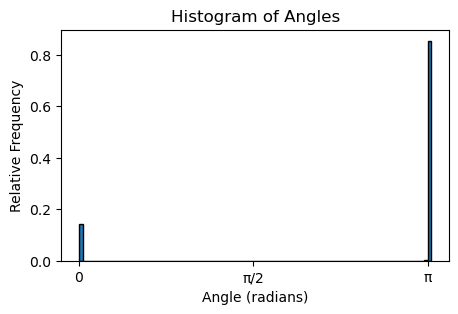

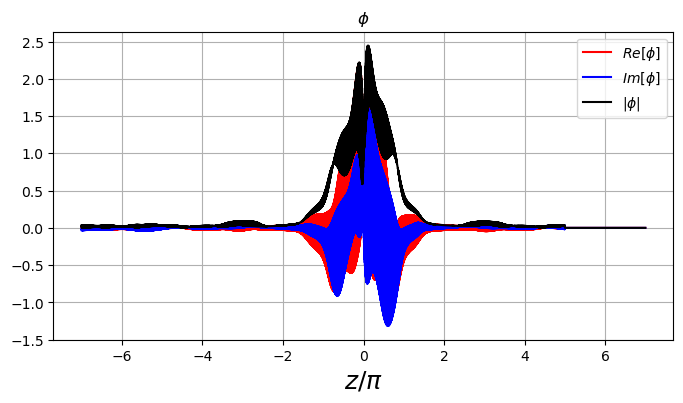

-3.1415923960661316 3.1415888425811085
0.0 3.1415923960661316


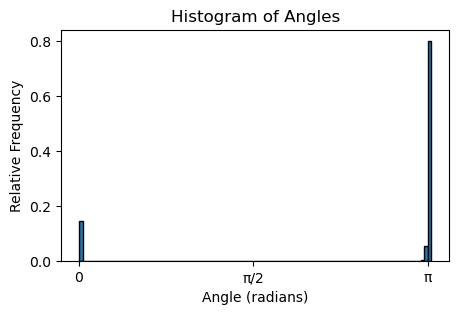

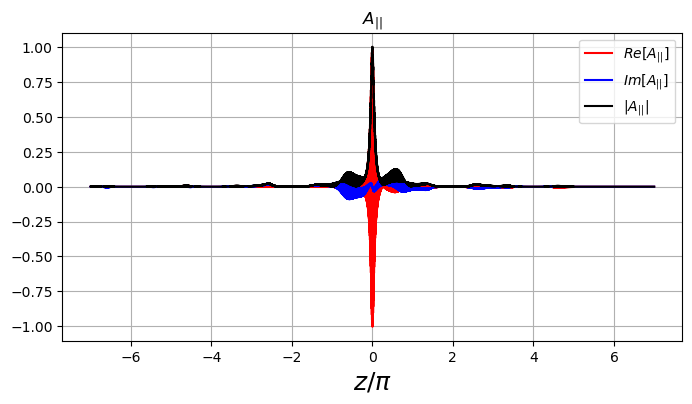

-3.1415912555043914 3.141591739397144
0.0 3.141591739397144


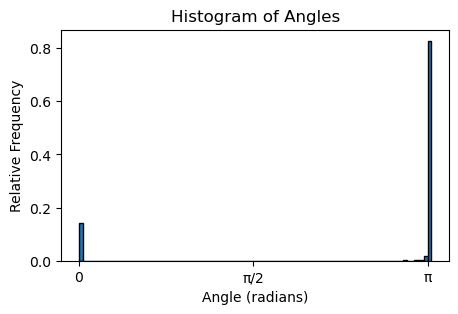

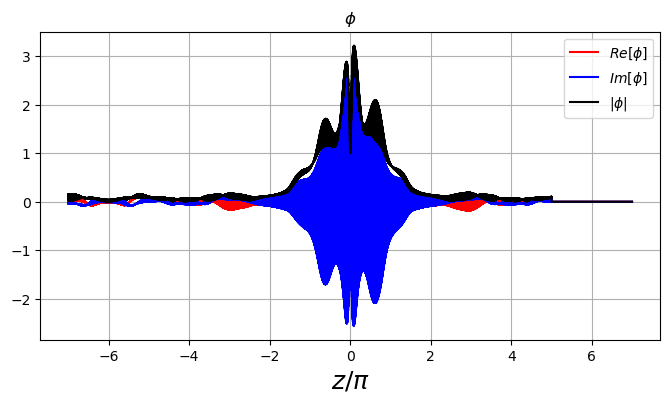

-3.141580995886456 3.1415910501488526
0.0 3.1415910501488526


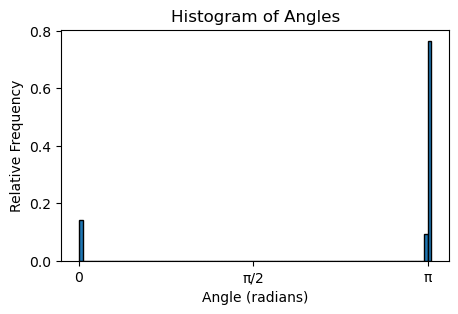

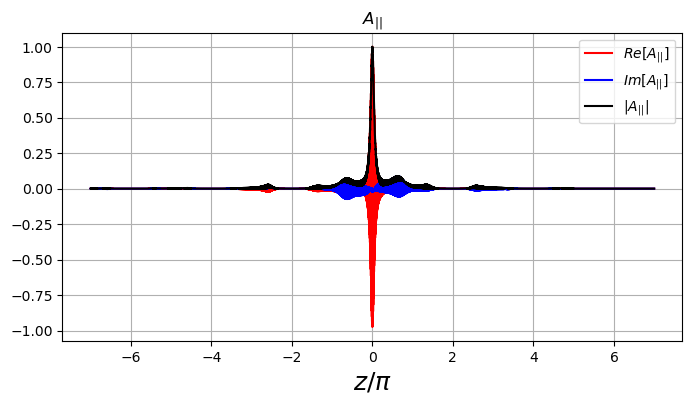

-3.1415888496129605 3.1415885945597872
0.0 3.1415888496129605


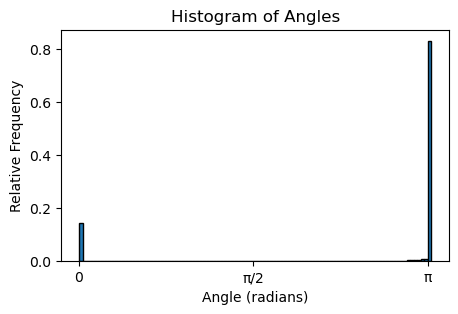

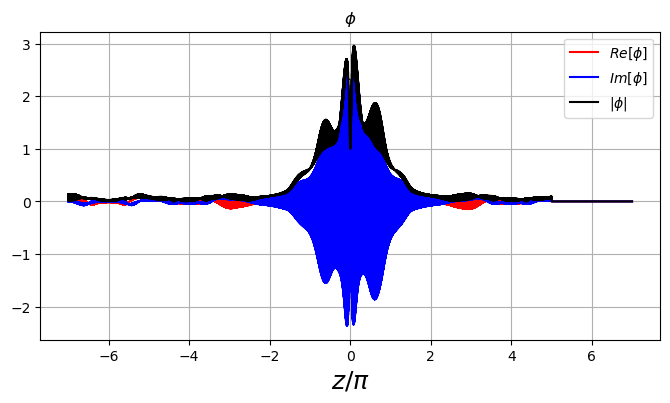

-3.1415902251067704 3.1415885475522156
0.0 3.1415902251067704


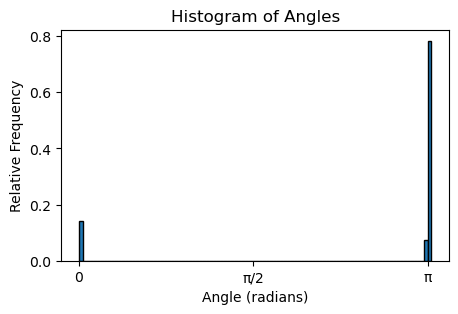

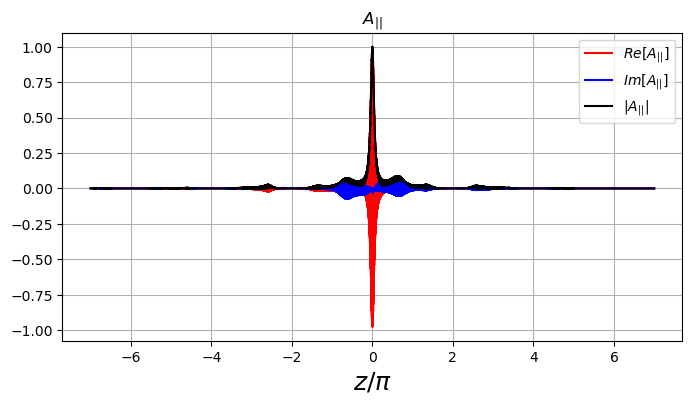

-3.141592413853643 3.141589048251757
0.0 3.141592413853643


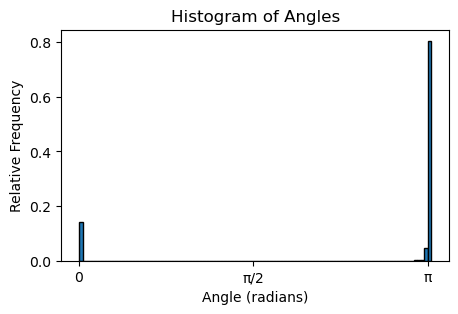

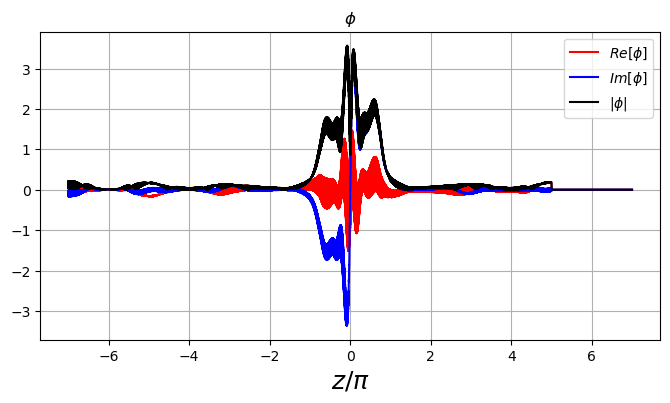

-3.1415877266389036 3.141590682428729
0.0 3.141590682428729


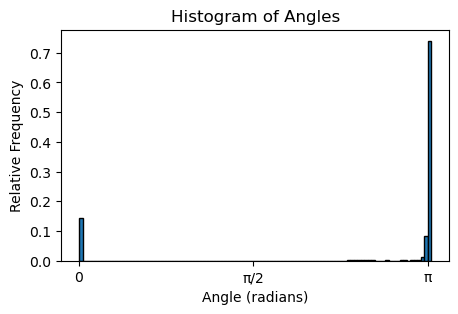

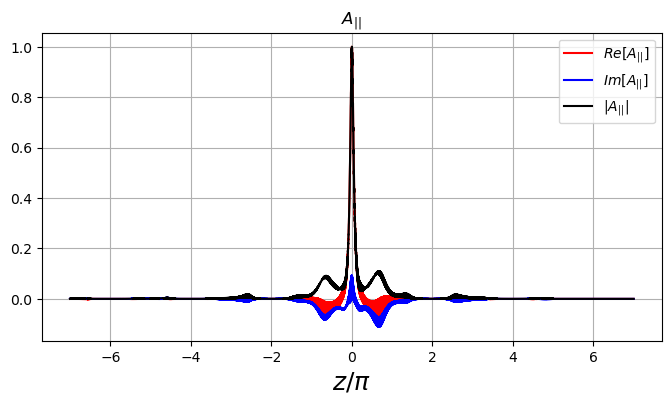

-3.14159255101331 3.1415922398213505
0.0 3.14159255101331


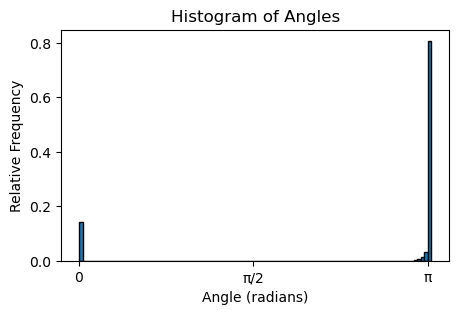

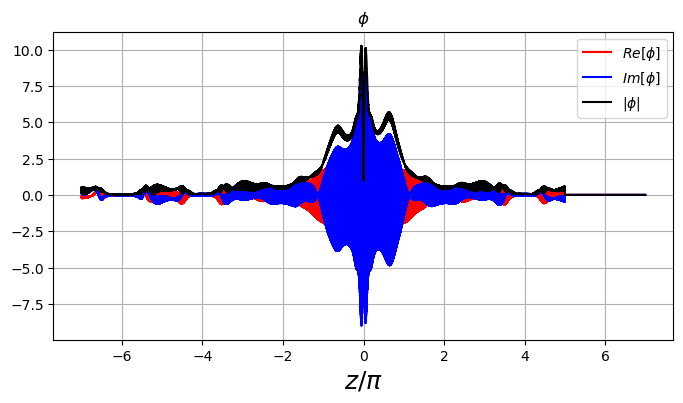

-3.141592107008866 3.1415918994430285
0.0 3.141592107008866


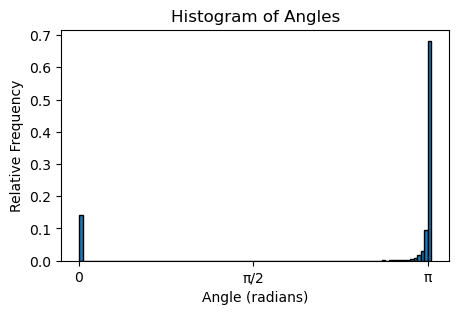

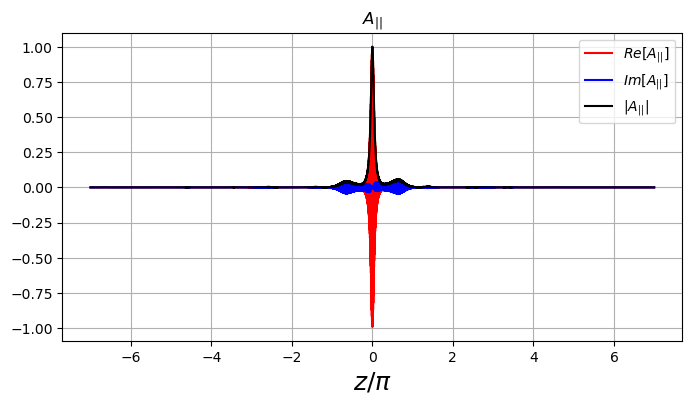

-3.141591089522685 3.1415924867412146
0.0 3.1415924867412146


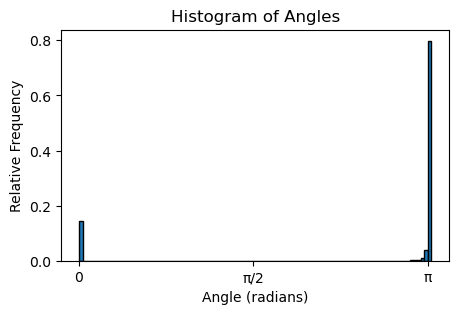

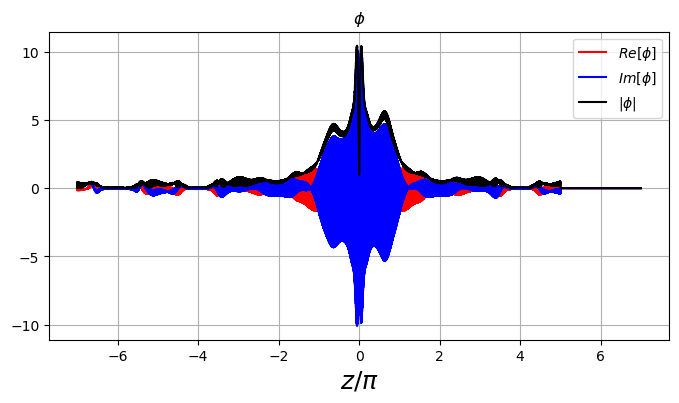

-3.141589255031298 3.1415882988628026
0.0 3.141589255031298


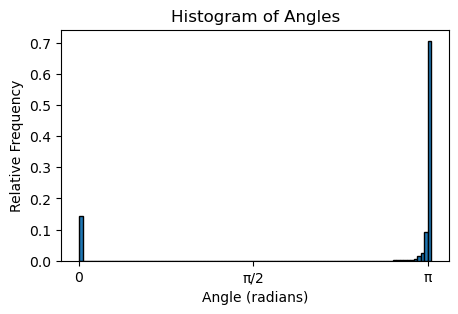

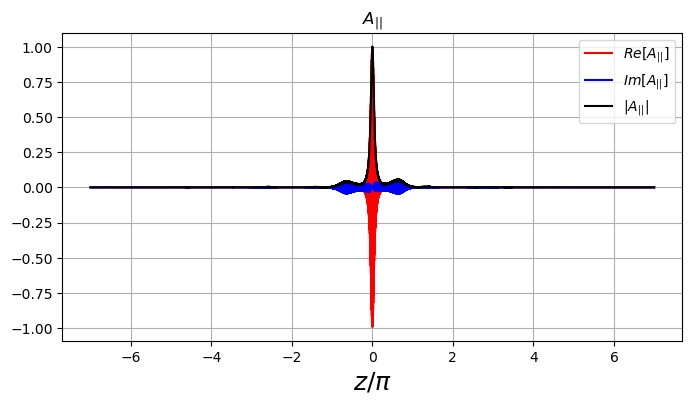

-3.141528741357609 3.1415534492506345
0.0 3.1415534492506345


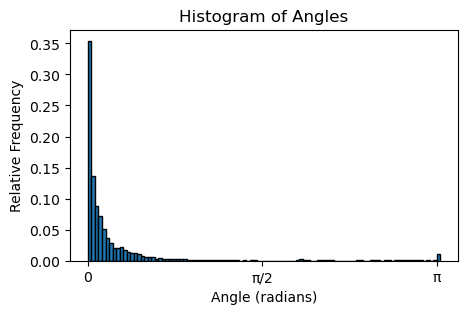

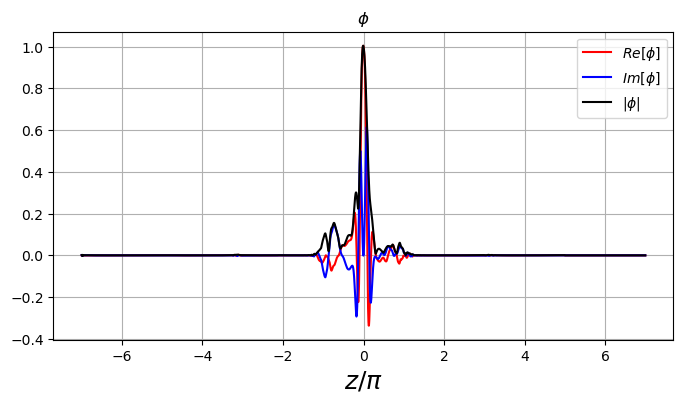

-3.1409370707933917 3.141574964624744
0.0 3.141574964624744


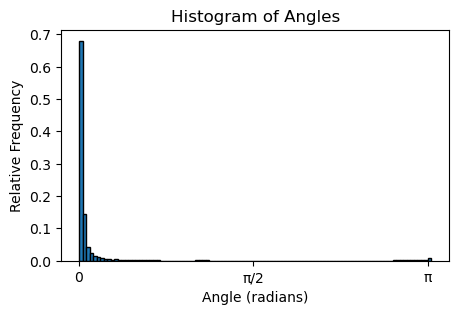

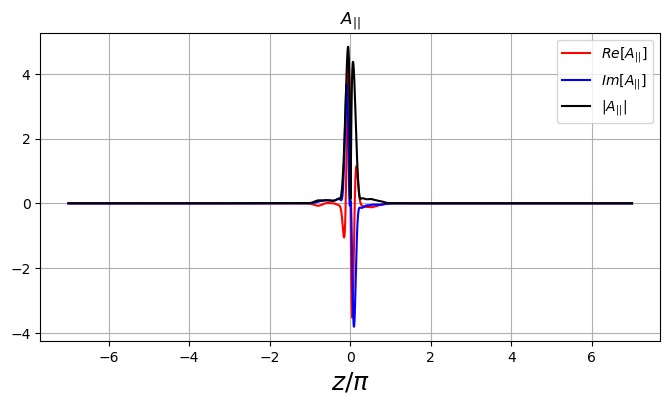

-3.1407750694589516 3.1404040945523106
0.0 3.1407750694589516


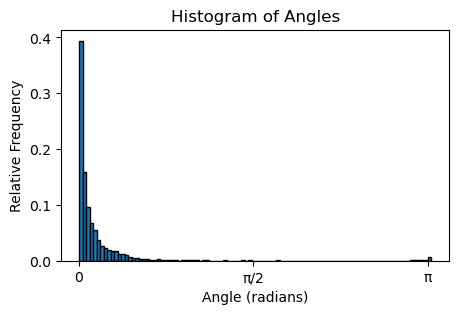

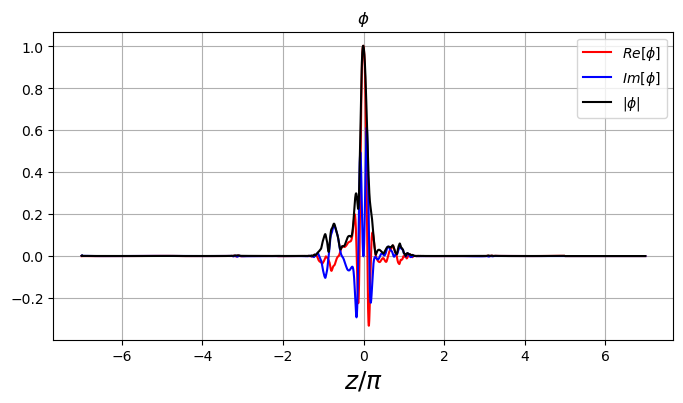

-3.1408702818275076 3.1414974245879255
0.0 3.1414974245879255


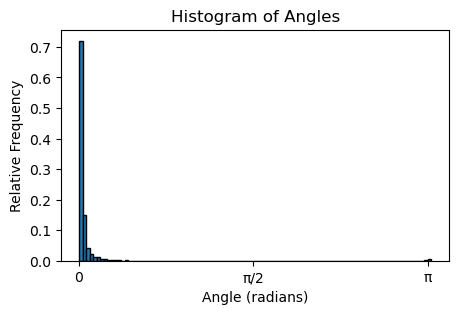

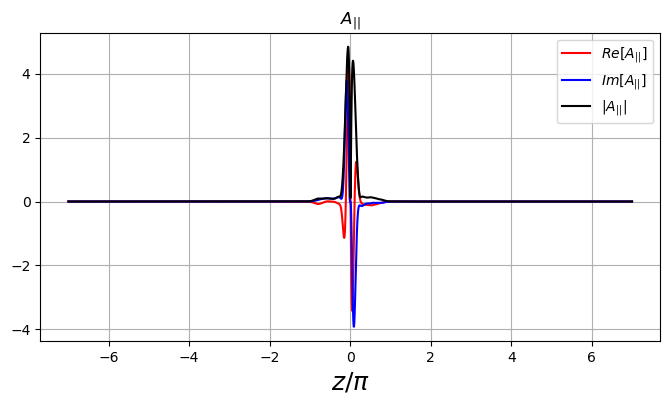

-3.1415919683513094 3.141589136127728
0.0 3.1415919683513094


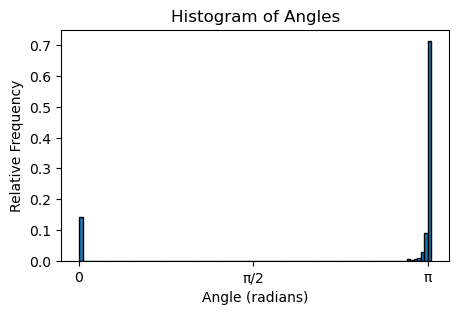

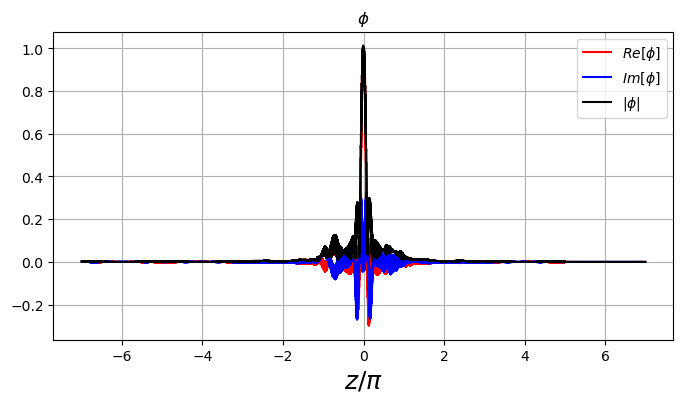

-3.1415919460119617 3.1415861764975848
0.0 3.1415919460119617


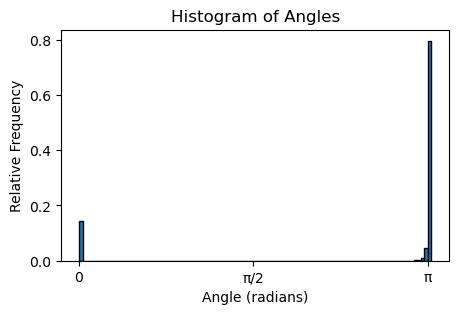

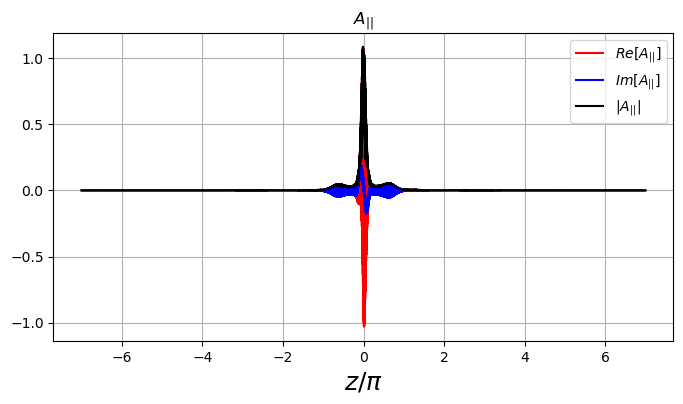

-3.1212895445939575 3.1383306252993117
0.0 3.1383306252993117


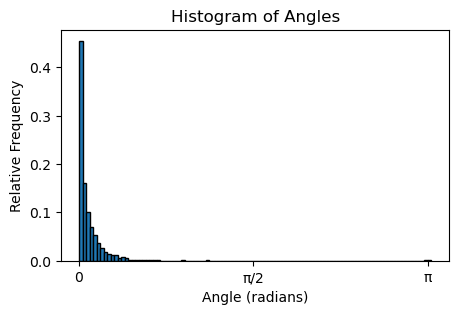

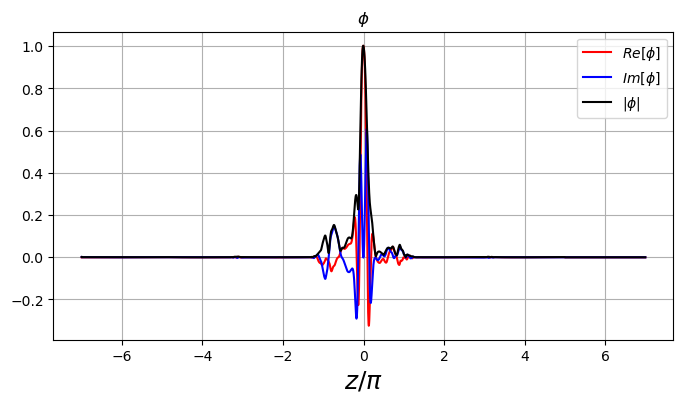

-3.131375763940065 3.1411720998480277
0.0 3.1411720998480277


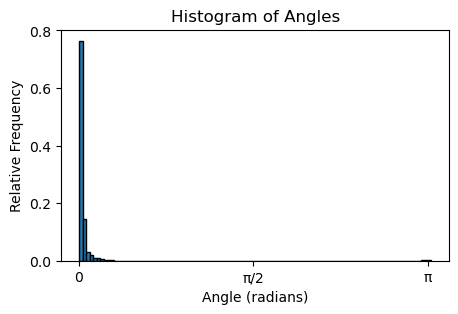

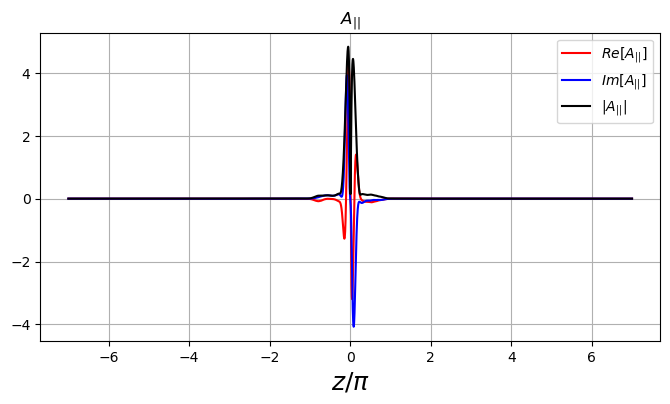

-3.14159238115189 3.141591953843891
0.0 3.14159238115189


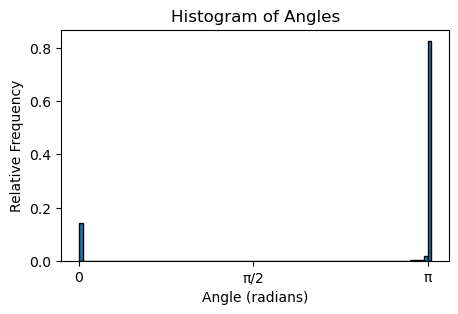

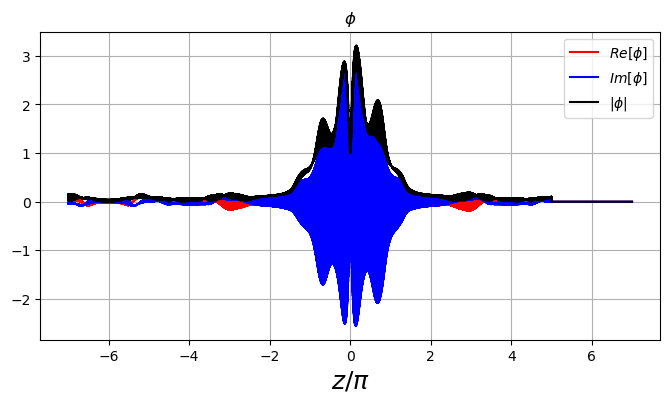

-3.14158474844709 3.1415915612664223
0.0 3.1415915612664223


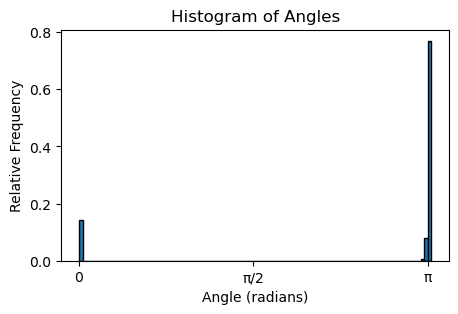

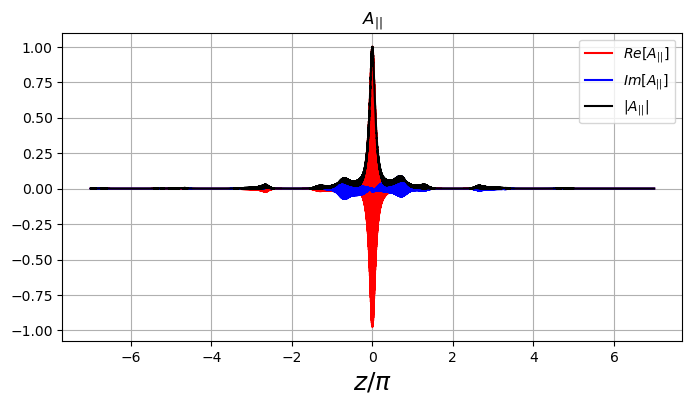

-3.141591661922537 3.1415855789490155
0.0 3.141591661922537


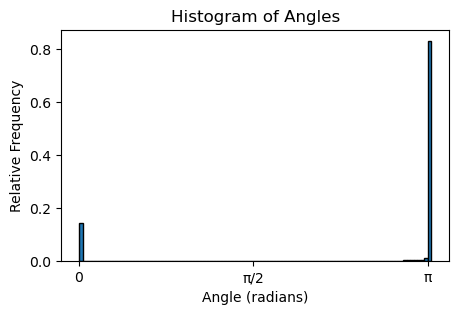

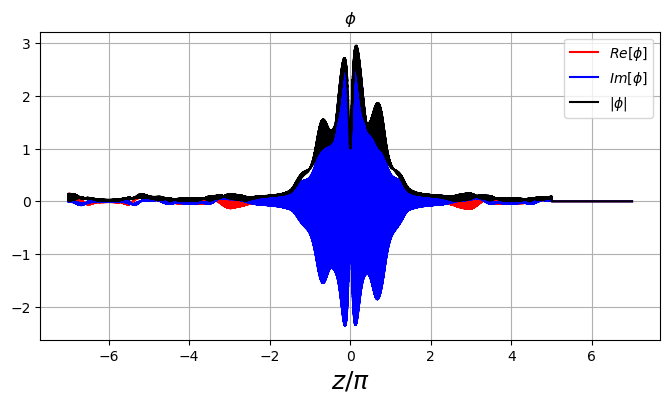

-3.141591552529265 3.141581396422169
0.0 3.141591552529265


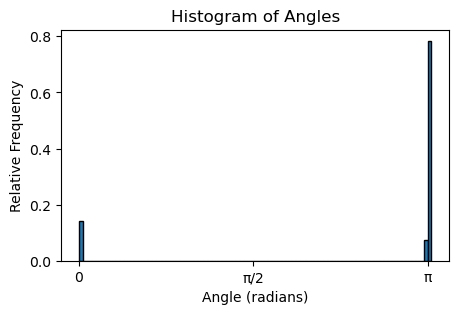

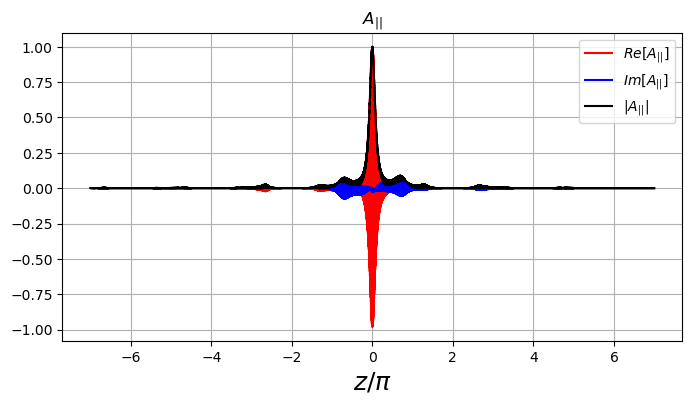

-3.141559760151784 3.141321026987125
0.0 3.141559760151784


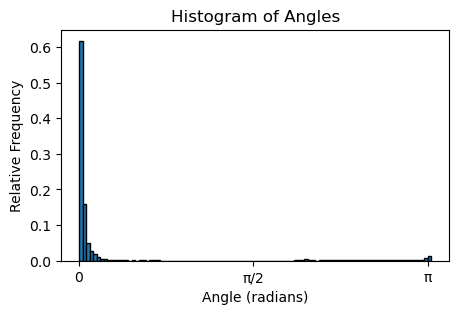

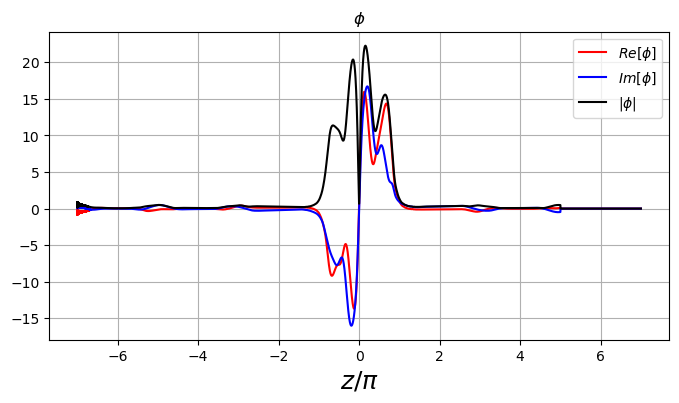

-3.1415619240626964 3.1413162955906193
0.0 3.1415619240626964


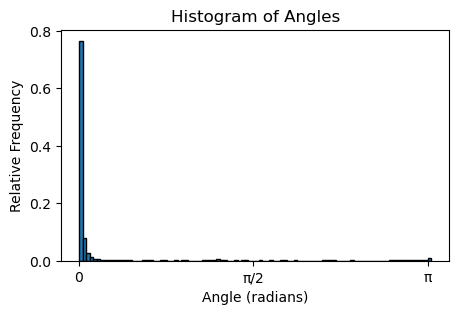

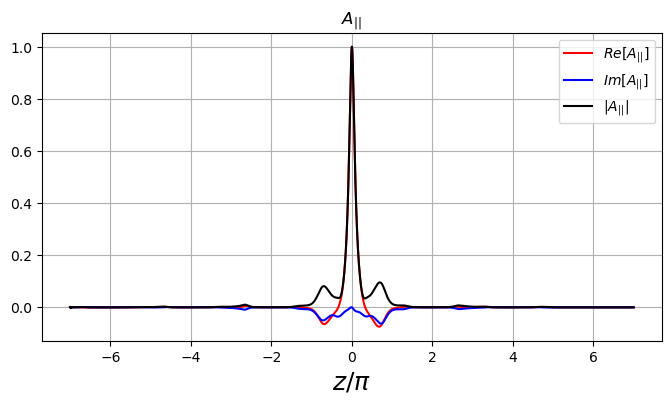

-3.1415530675271817 3.1409327670880796
0.0 3.1415530675271817


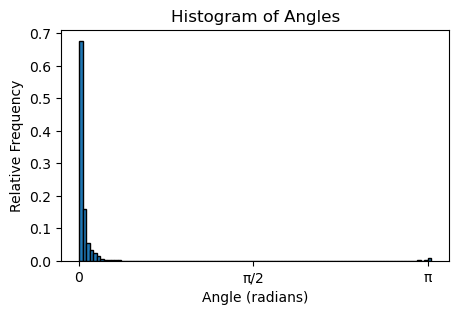

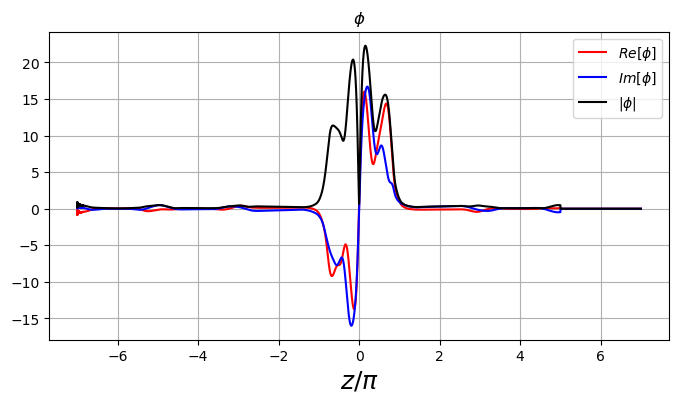

-3.140800966879952 3.1412305730365784
0.0 3.1412305730365784


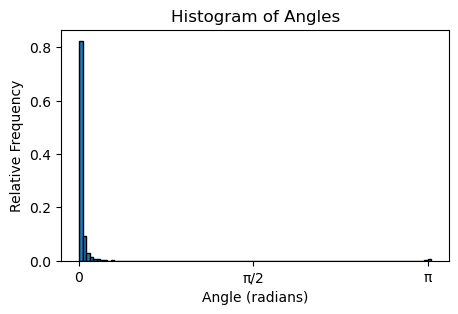

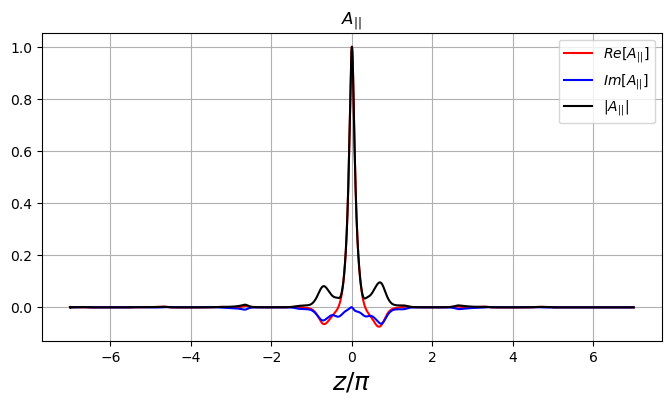

-3.1415917071770996 3.141588592050044
0.0 3.1415917071770996


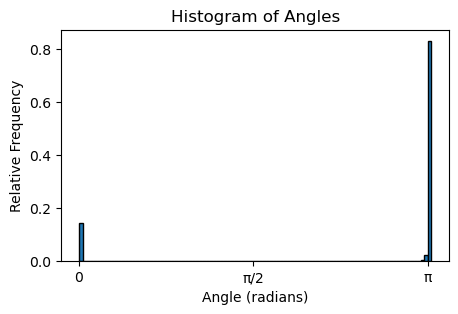

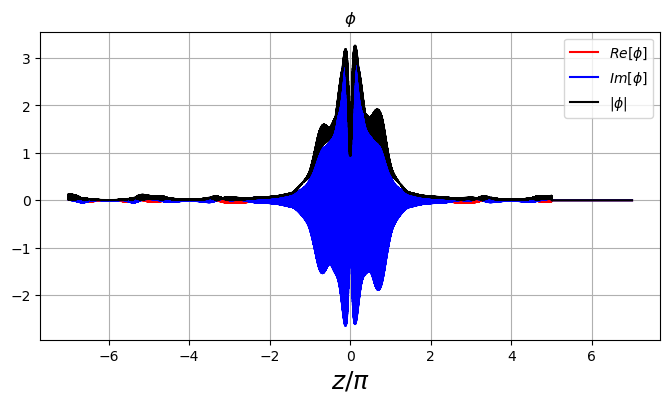

-3.1415903123065108 3.1415923358893436
0.0 3.1415923358893436


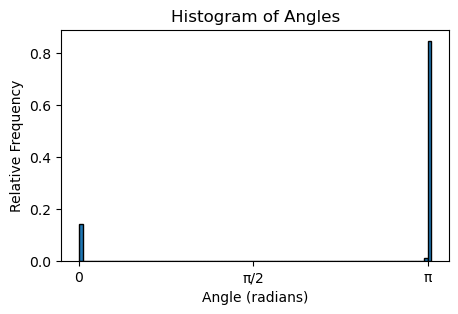

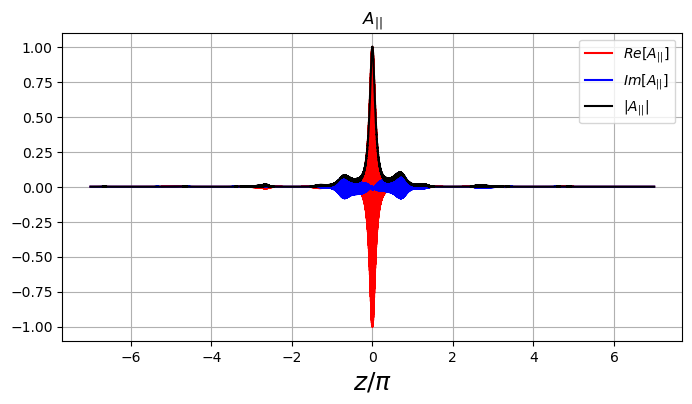

-3.118484019612893 3.1380265943886925
0.0 3.1380265943886925


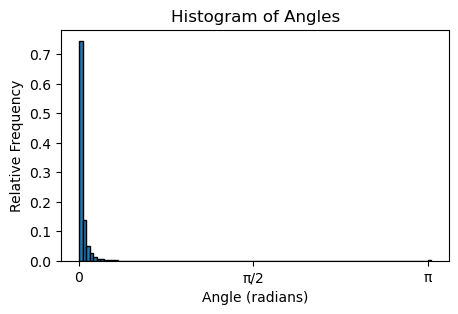

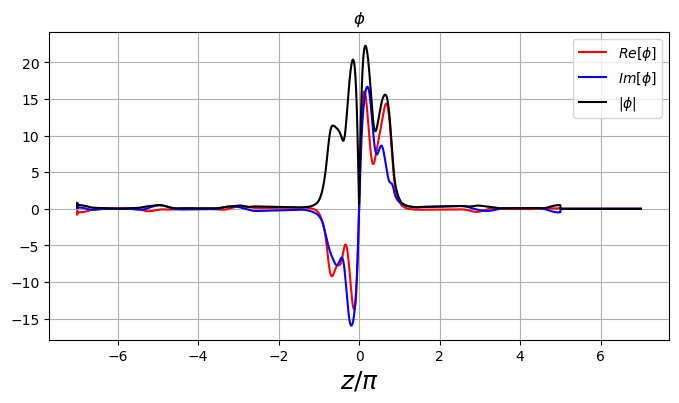

-3.138012243767566 3.139098073646664
0.0 3.139098073646664


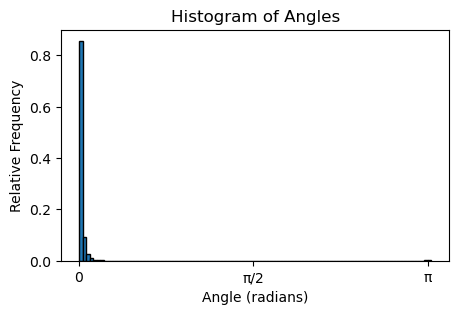

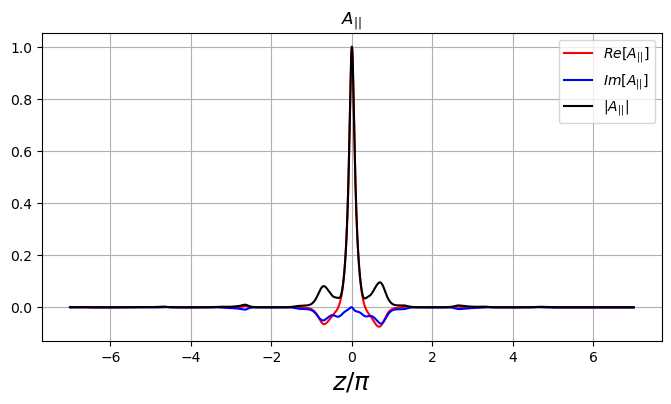

-3.141589151295751 3.14159170275102
0.0 3.14159170275102


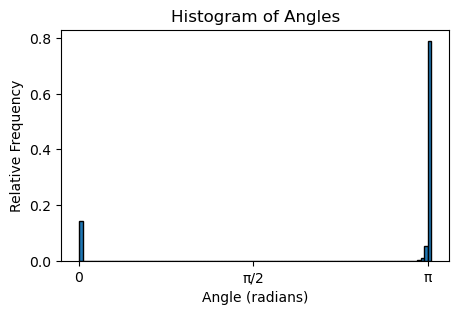

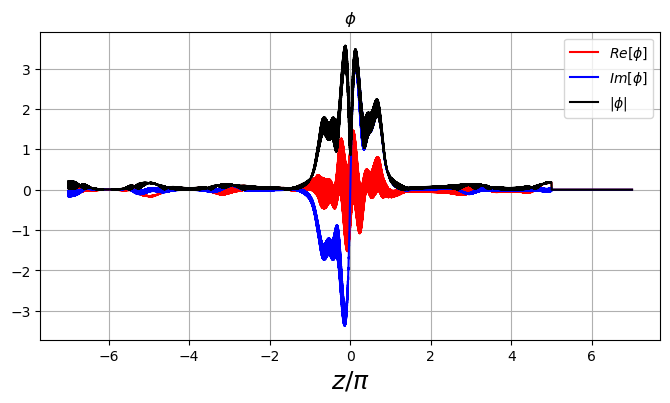

-3.1415915615709378 3.1415911286105858
0.0 3.1415915615709378


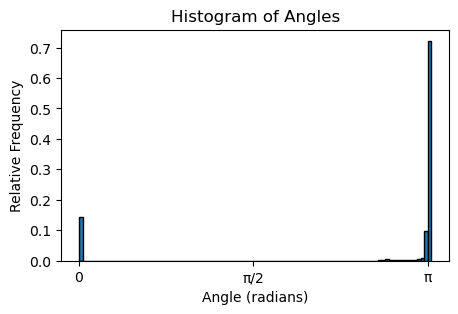

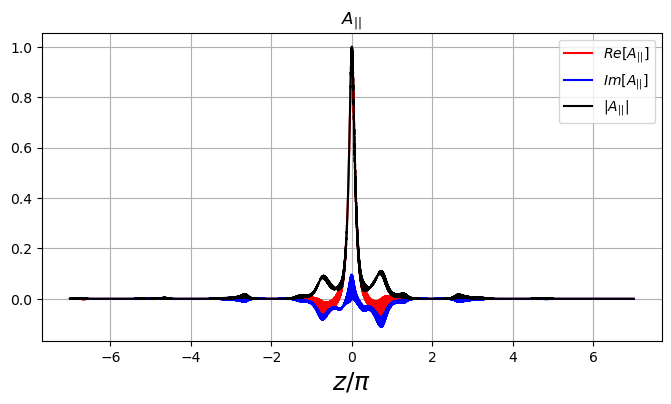

-3.1415914898025323 3.1415903538892023
0.0 3.1415914898025323


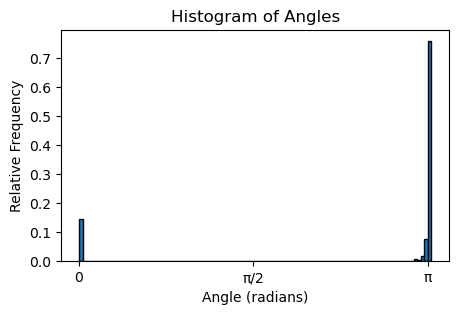

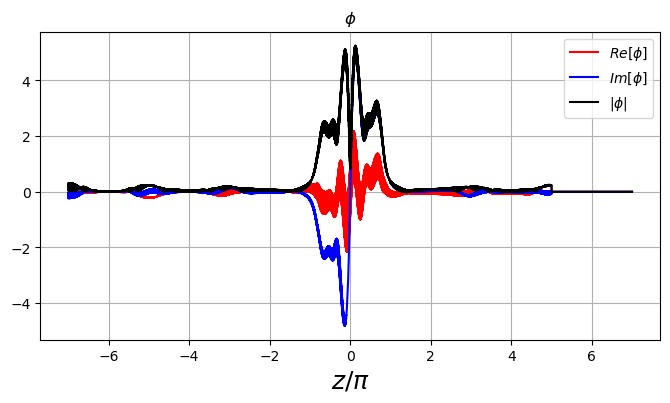

-3.141591291488892 3.1415880229225217
0.0 3.141591291488892


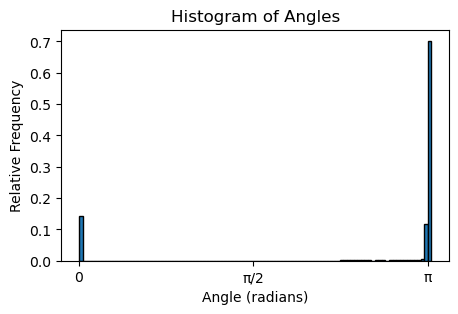

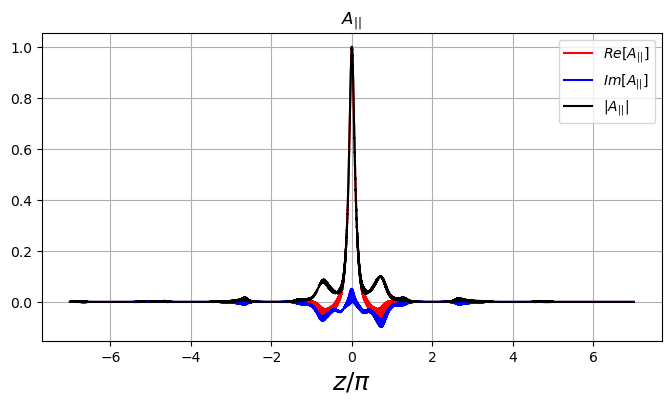

-3.1415901409804476 3.1415925691884707
0.0 3.1415925691884707


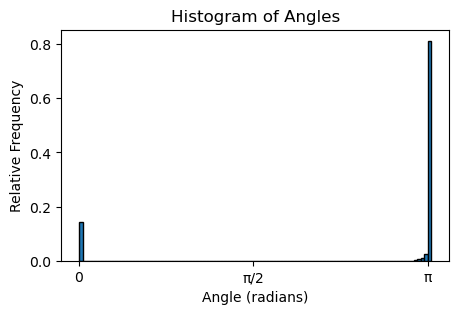

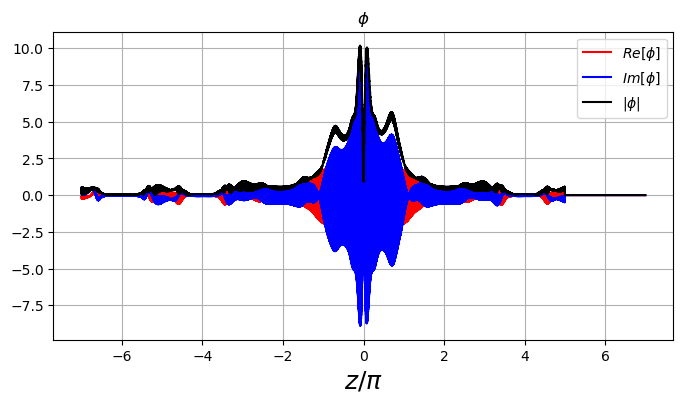

-3.141589550177841 3.1415908475997867
0.0 3.1415908475997867


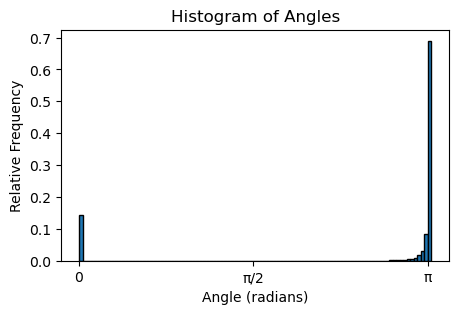

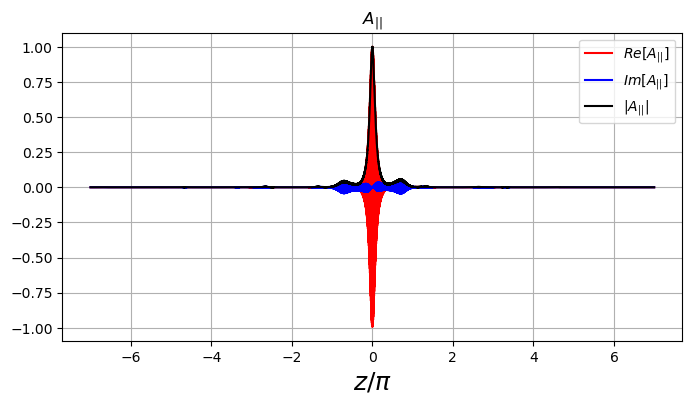

-3.1415924996297093 3.141589598883019
0.0 3.1415924996297093


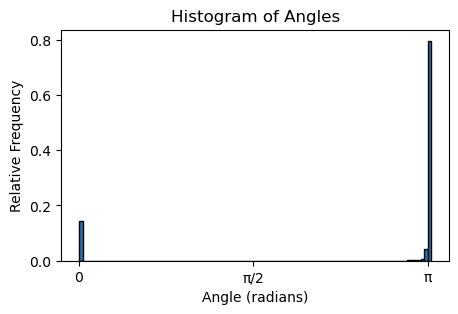

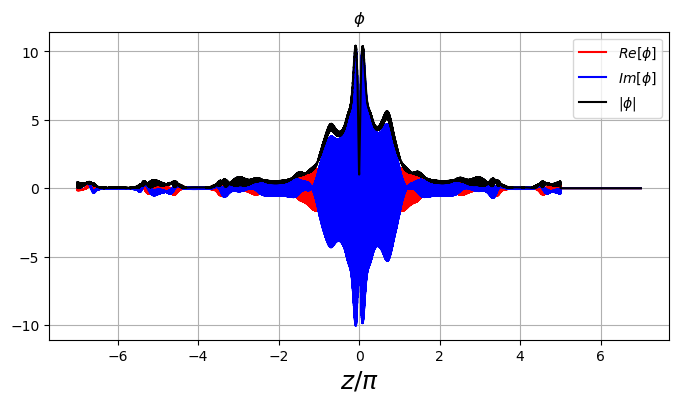

-3.141589847478653 3.141583637325063
0.0 3.141589847478653


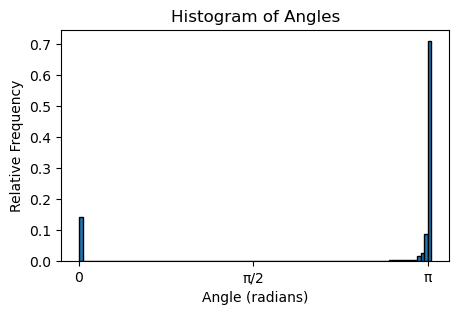

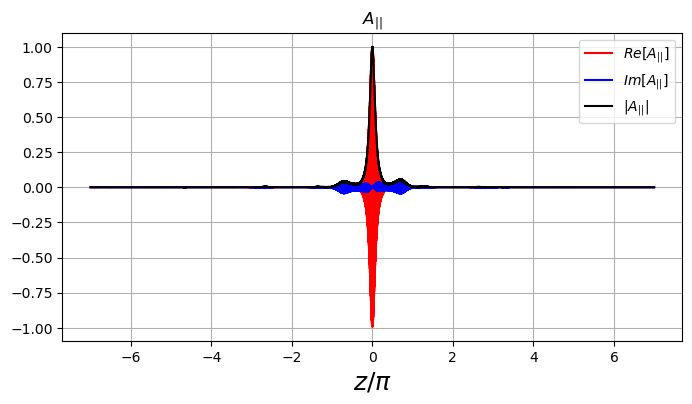

-3.1415357011963 3.139980178854533
0.0 3.1415357011963


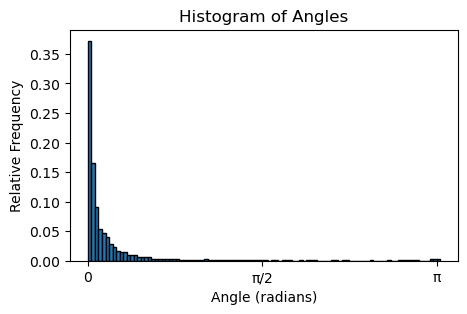

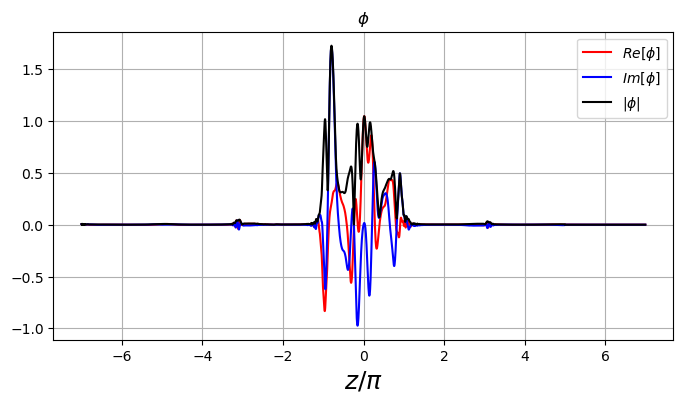

-3.1393818981472936 3.141562776357528
0.0 3.141562776357528


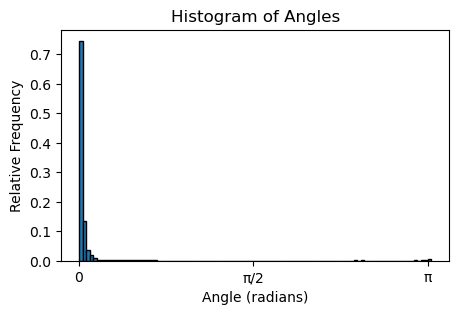

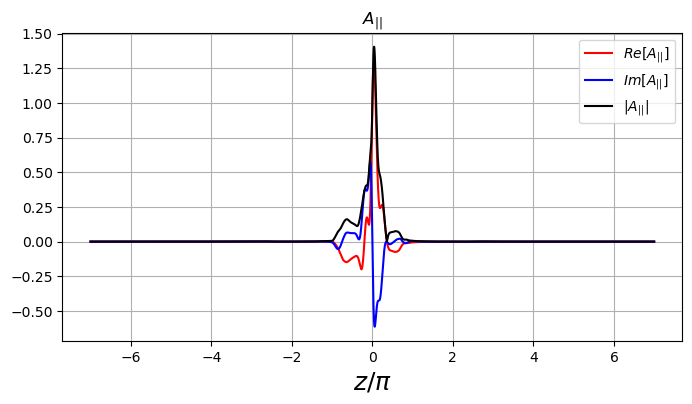

-3.1384488333841443 3.139454264430168
0.0 3.139454264430168


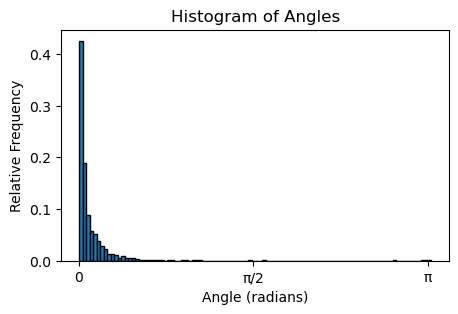

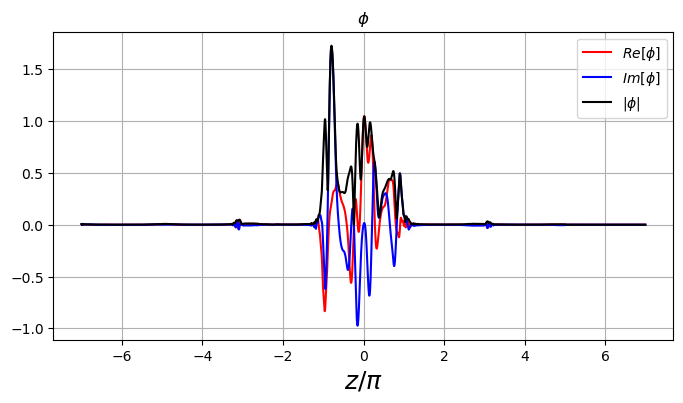

-3.1384048130942985 3.1398472476185146
0.0 3.1398472476185146


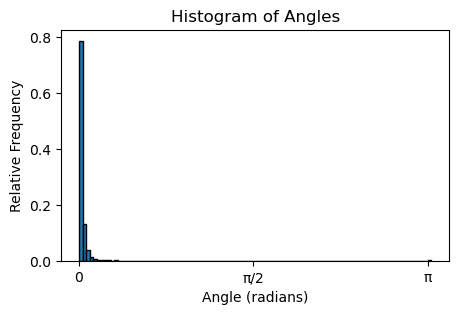

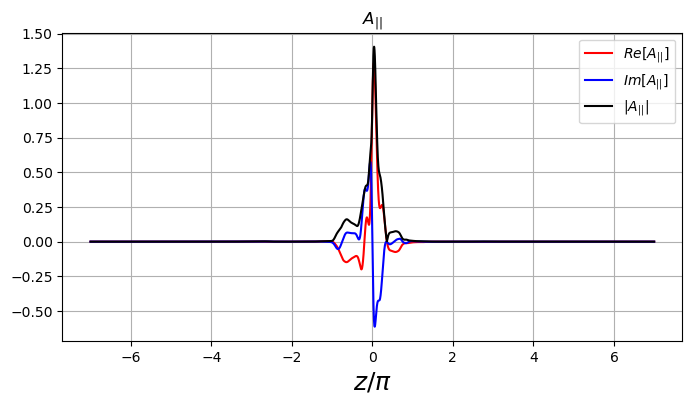

-3.141590543646883 3.1415871761414285
0.0 3.141590543646883


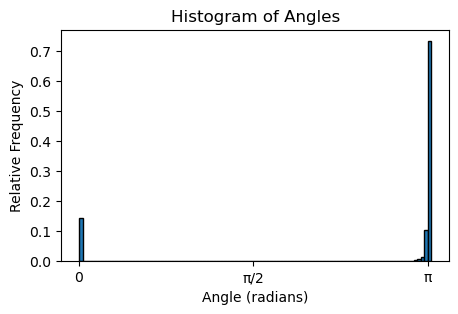

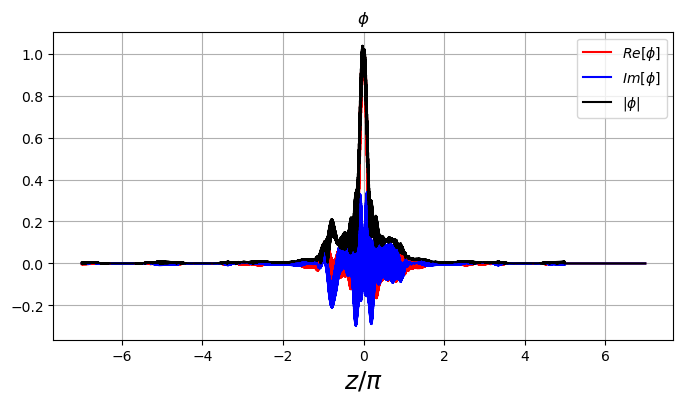

-3.141592207194669 3.141582565358453
0.0 3.141592207194669


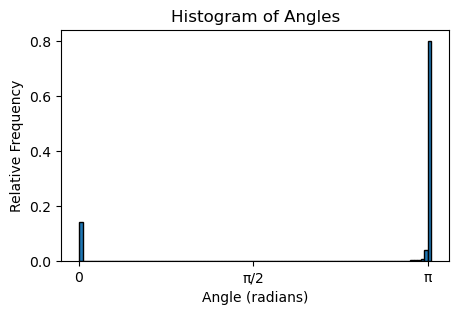

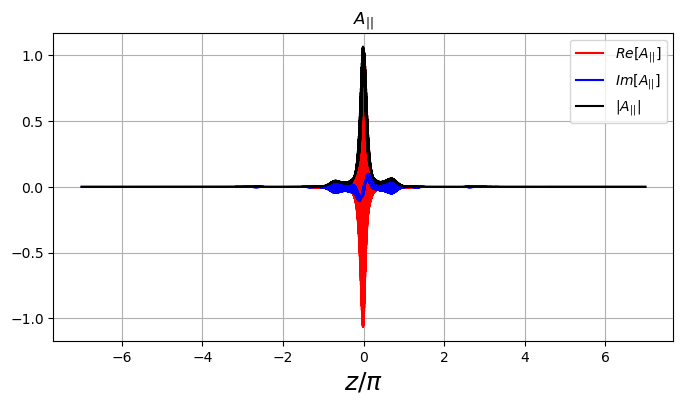

-3.064775714891198 3.011458485766782
0.0 3.064775714891198


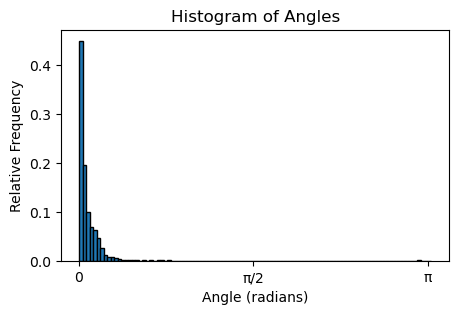

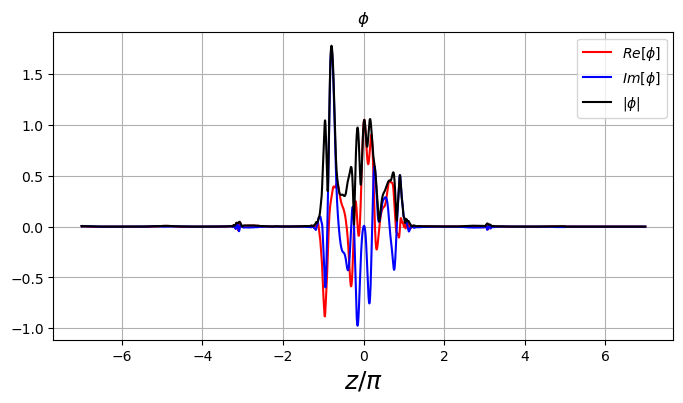

-3.139591153050135 3.123450488072015
0.0 3.139591153050135


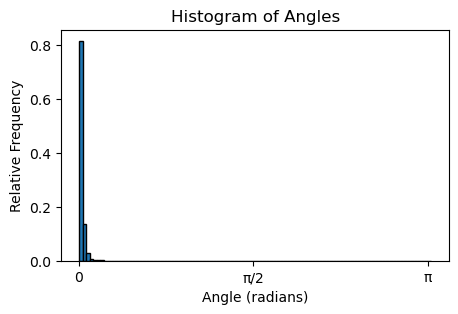

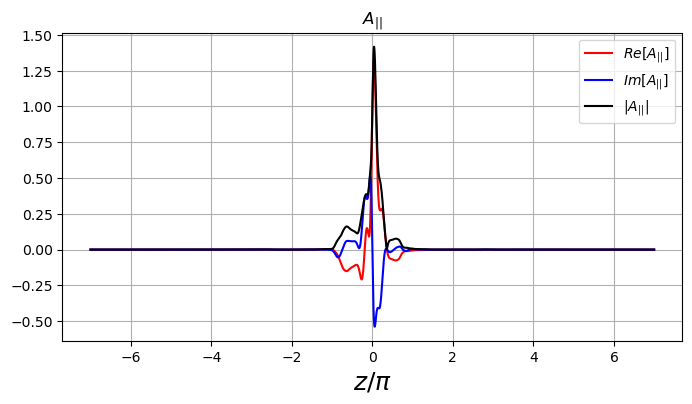

-3.141591632813212 3.1415658306602166
0.0 3.141591632813212


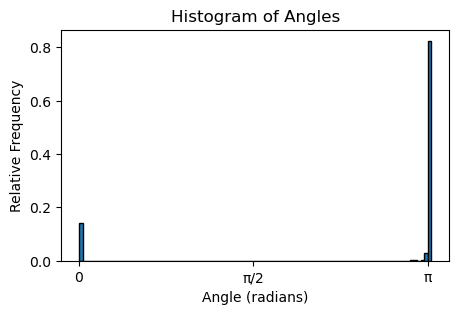

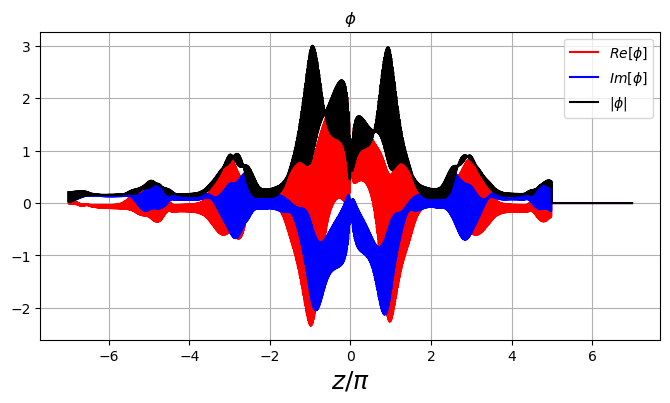

-3.141586115103882 3.1415358048394277
0.0 3.141586115103882


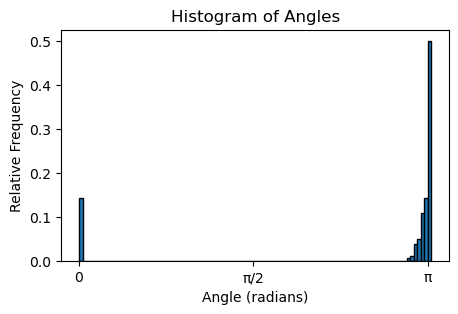

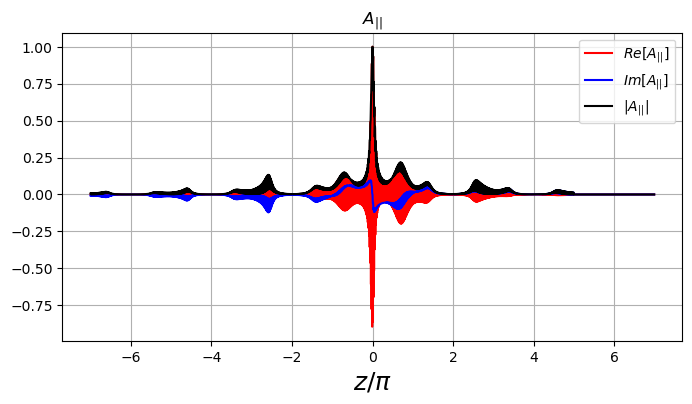

-3.1406245416089638 3.141513672505756
0.0 3.141513672505756


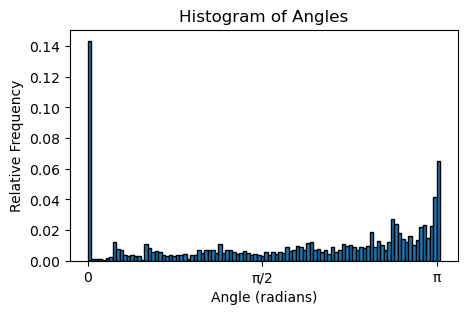

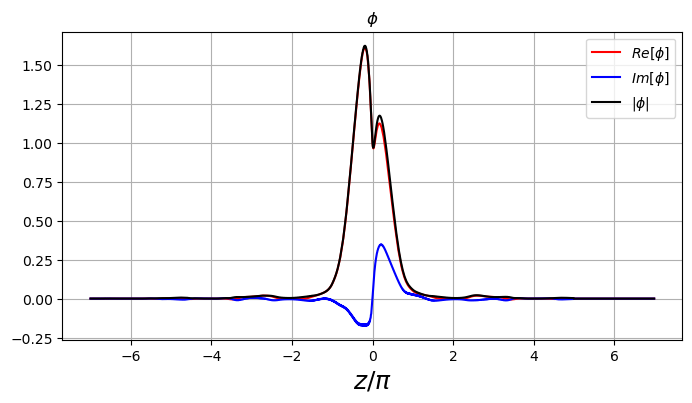

-3.14155638775201 3.141571364244508
0.0 3.141571364244508


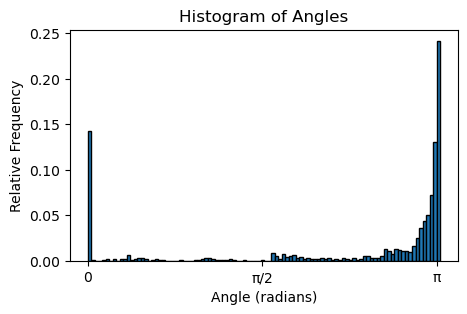

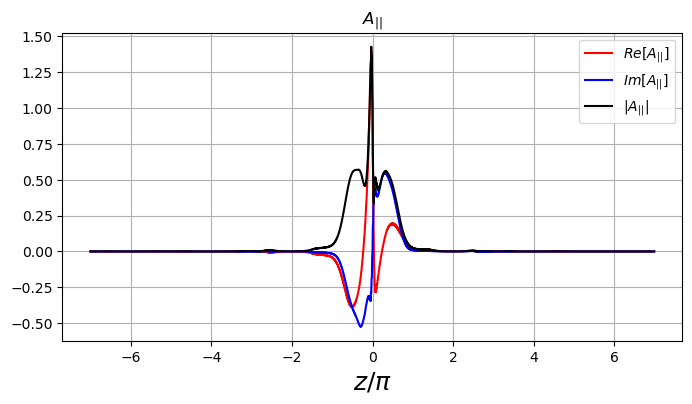

-3.1415916237396195 3.1415804027356353
0.0 3.1415916237396195


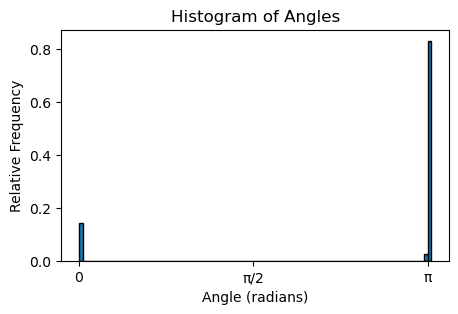

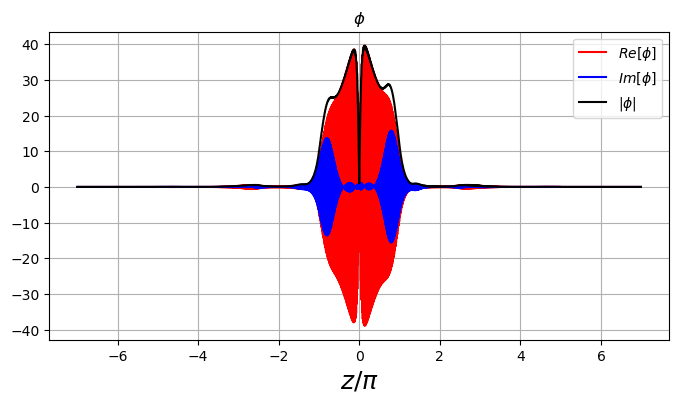

-3.1415866731405715 3.141591938686582
0.0 3.141591938686582


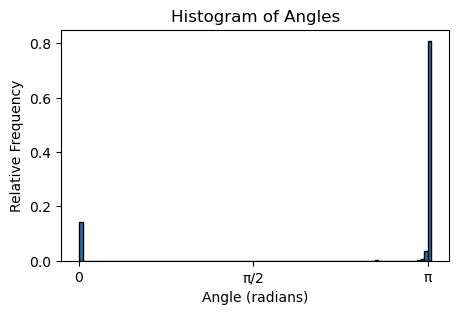

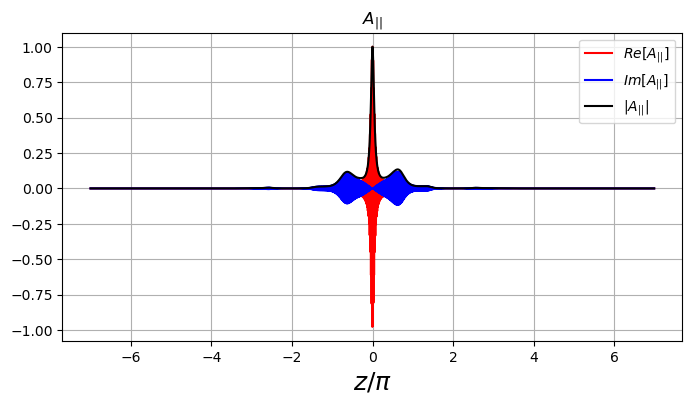

-3.1415871654106247 3.1414708173795423
0.0 3.1415871654106247


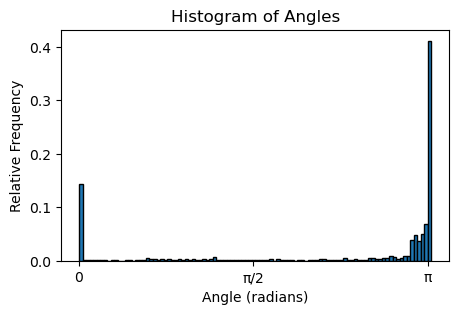

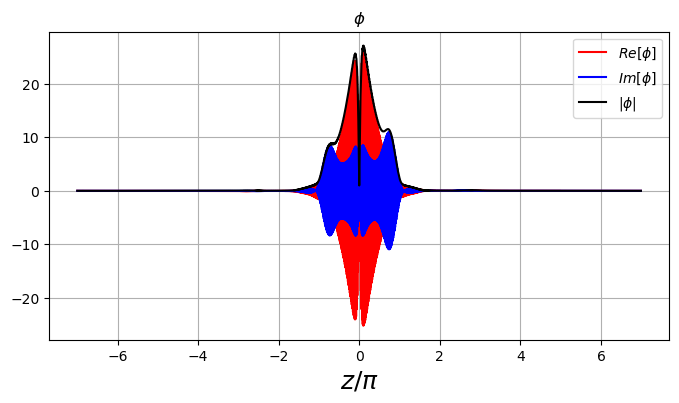

-3.1415856253669223 3.141582767615805
0.0 3.1415856253669223


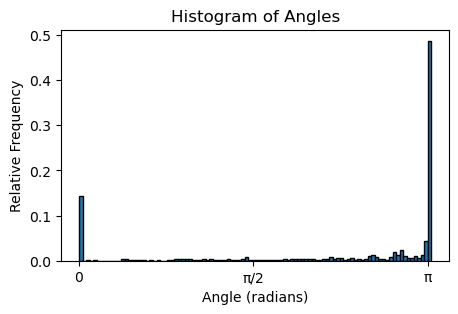

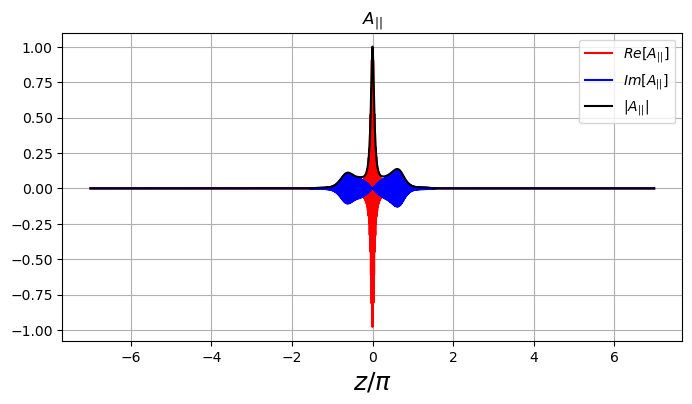

-3.1415866915128583 3.141446449355281
0.0 3.1415866915128583


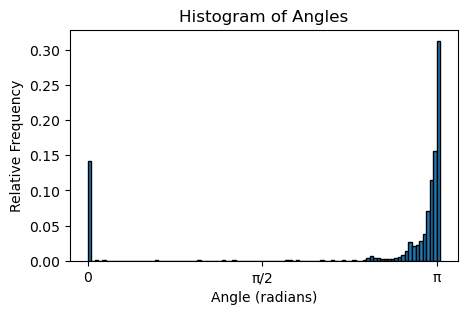

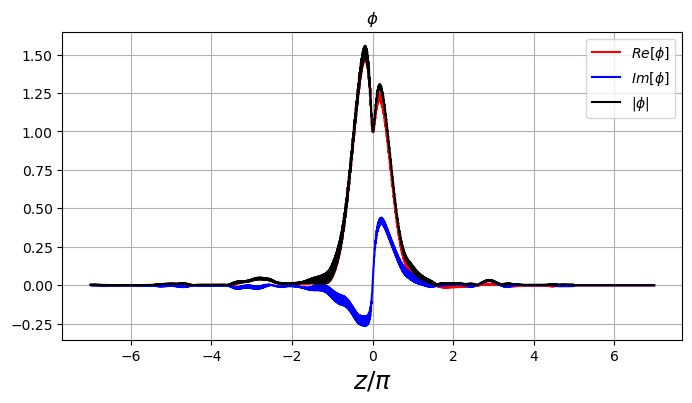

-3.1415561260492444 3.1415919174745075
0.0 3.1415919174745075


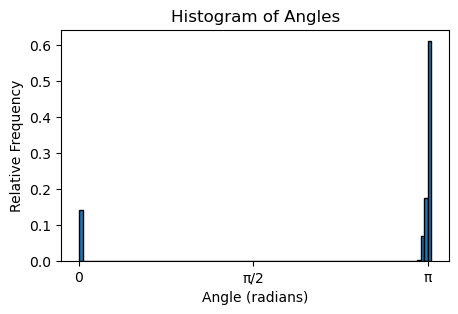

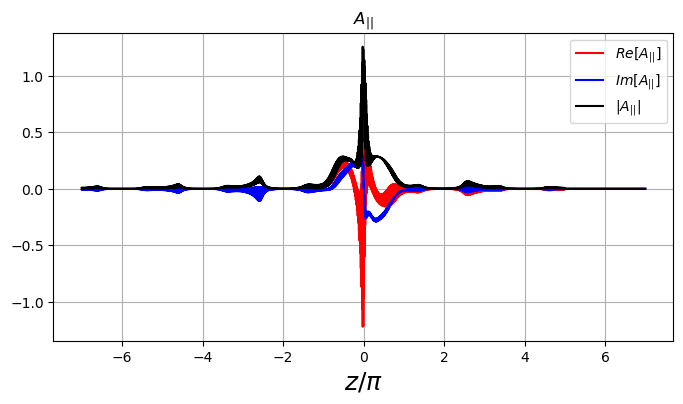

-3.1405290212800683 3.1385890715341658
0.0 3.1405290212800683


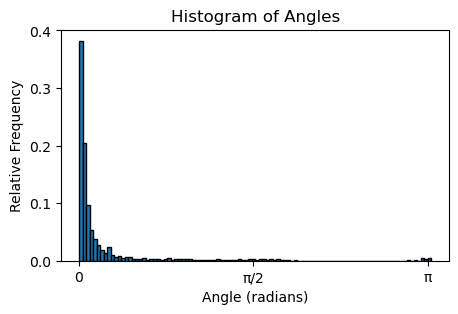

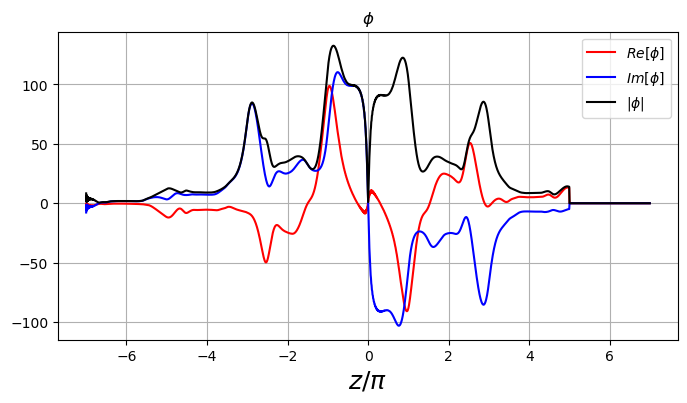

-3.1415296105907378 3.140774728805976
0.0 3.1415296105907378


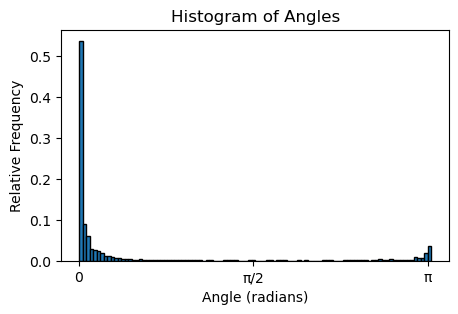

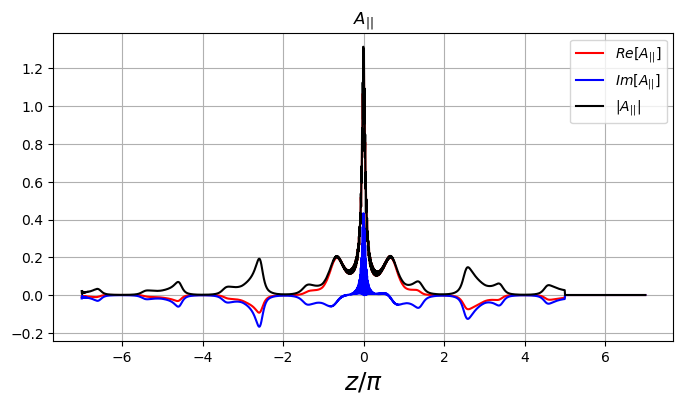

-3.141592478871269 3.141532570475377
0.0 3.141592478871269


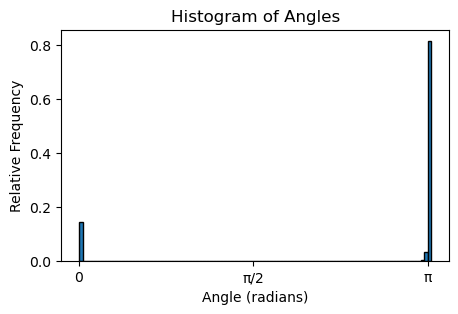

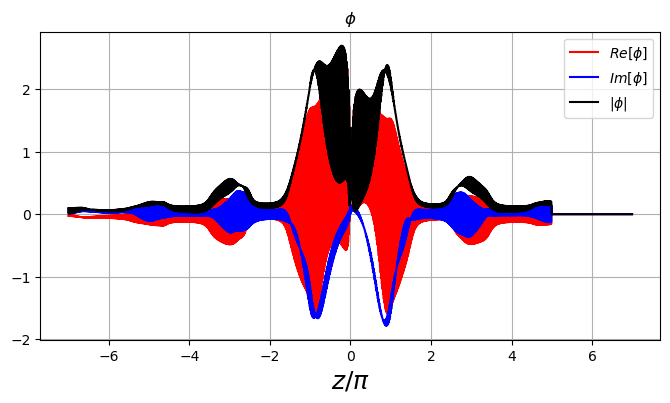

-3.1415410755711504 3.1415361830633803
0.0 3.1415410755711504


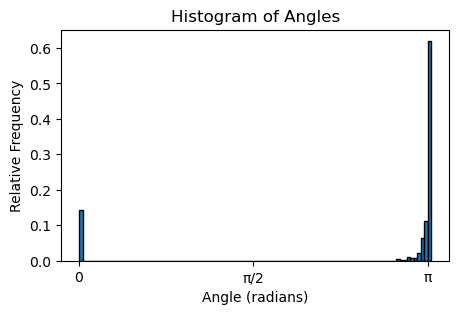

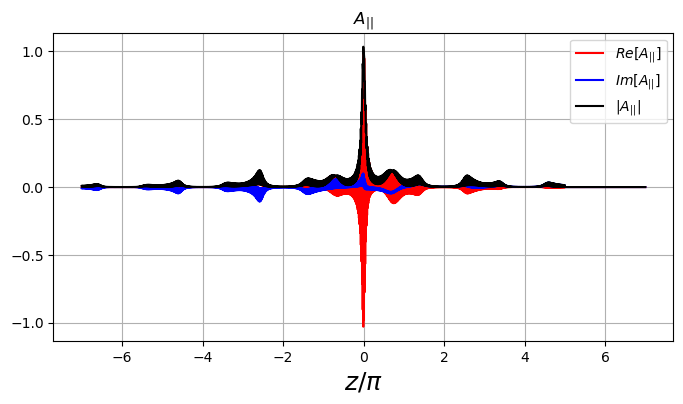

-3.141591370406039 3.141573510871213
0.0 3.141591370406039


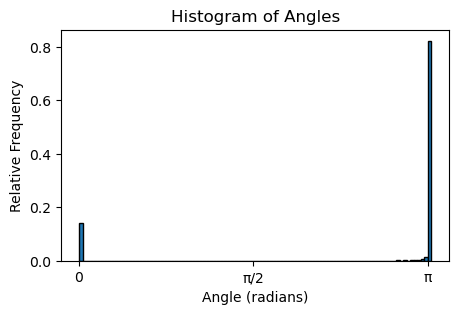

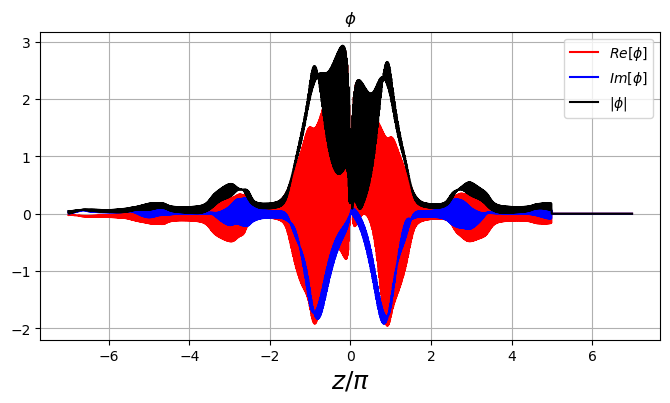

-3.1415759382955946 3.1415920457409934
0.0 3.1415920457409934


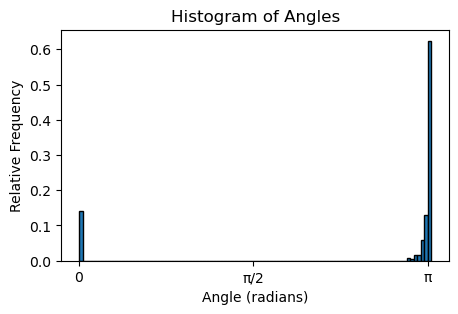

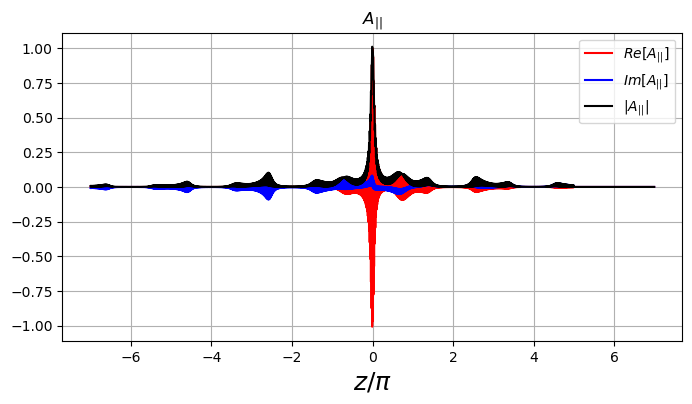

-3.1415827776065073 3.141588096947709
0.0 3.141588096947709


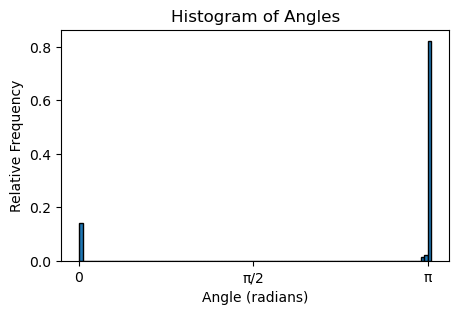

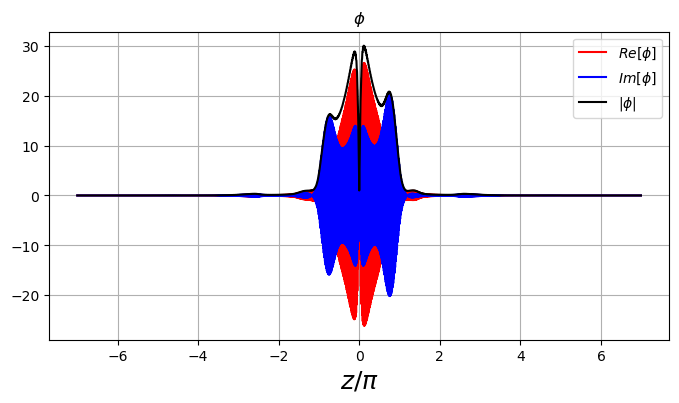

-3.1415822215928237 3.141578006779655
0.0 3.1415822215928237


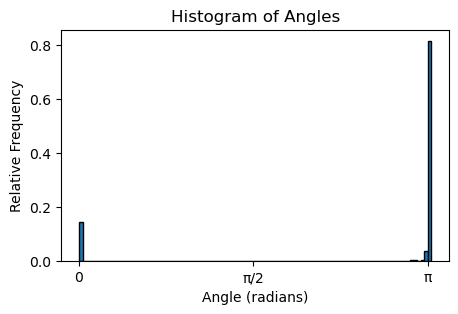

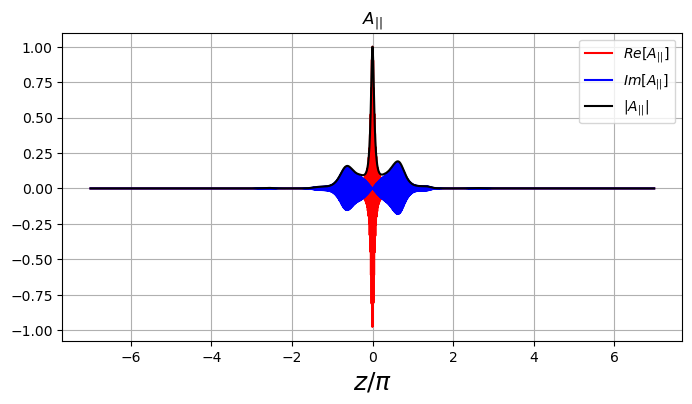

-3.141415072064528 3.1409455844803187
0.0 3.141415072064528


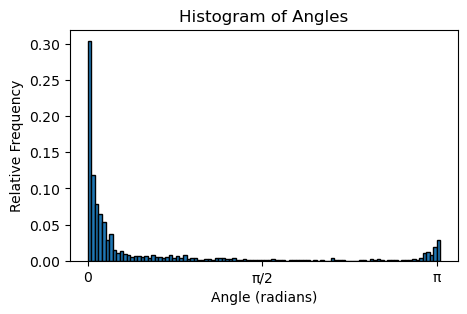

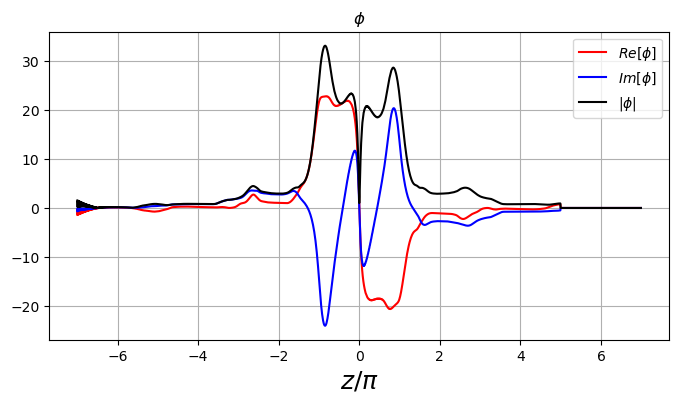

-3.1405779925820365 3.141570950551687
0.0 3.141570950551687


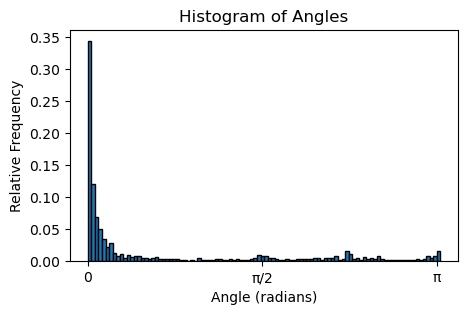

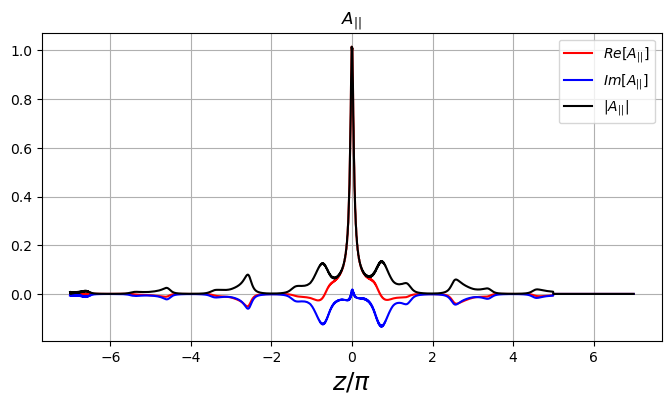

-3.1415877813415065 3.1415644981296063
0.0 3.1415877813415065


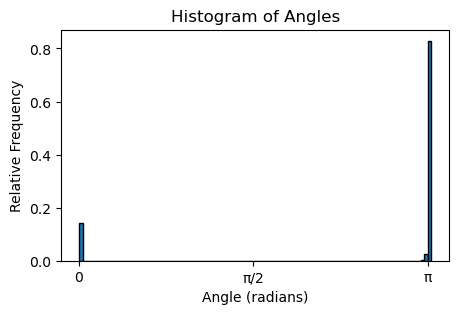

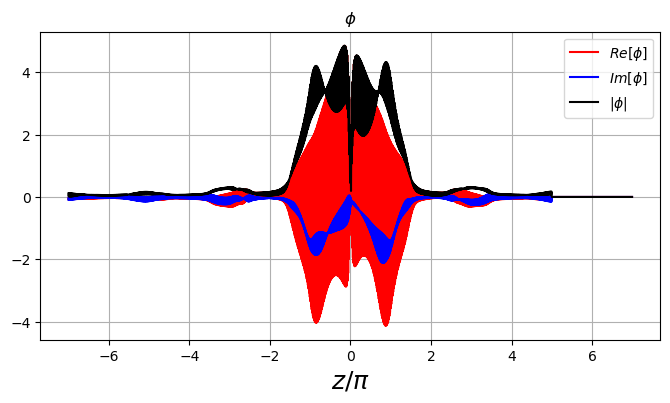

-3.141540949289288 3.1415746407056573
0.0 3.1415746407056573


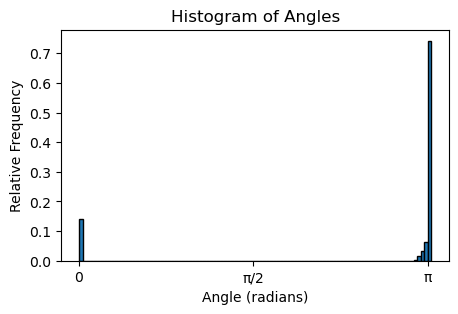

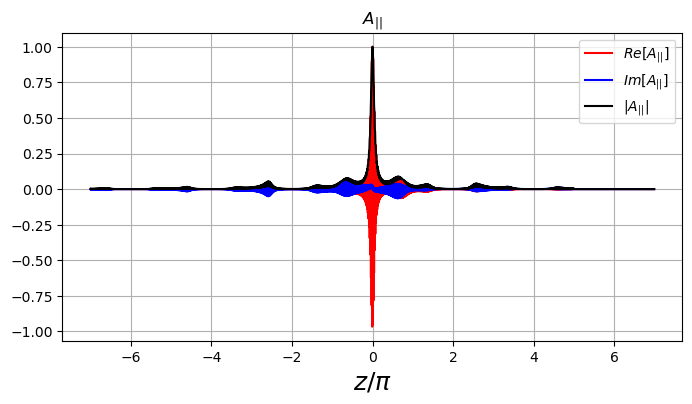

-3.1327522694667707 3.140664905293464
0.0 3.140664905293464


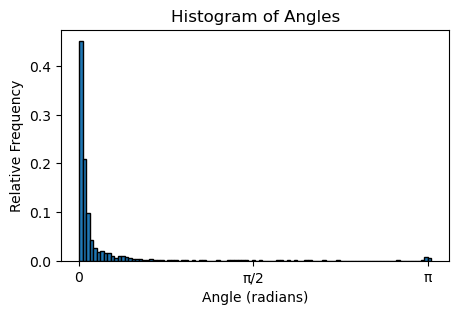

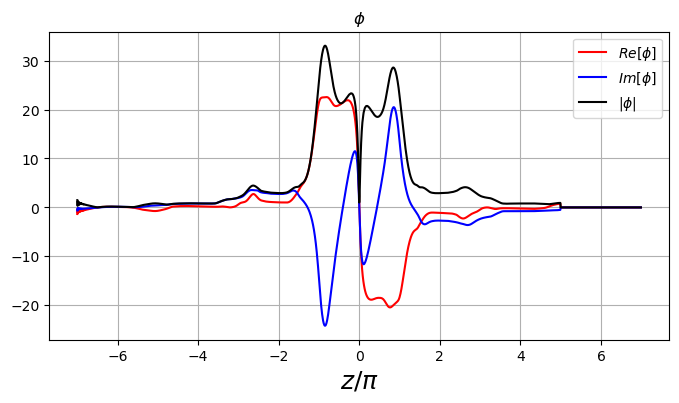

-3.1410246677500653 3.1391191863924326
0.0 3.1410246677500653


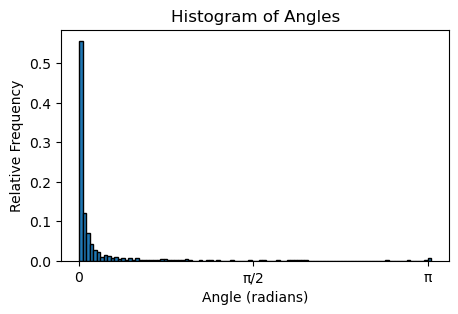

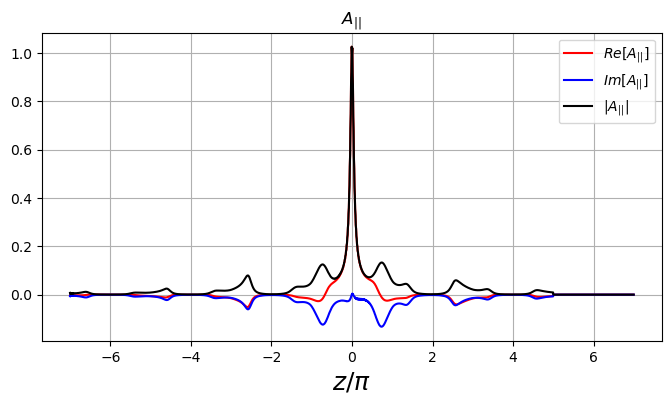

-3.141586712416156 3.141588796476609
0.0 3.141588796476609


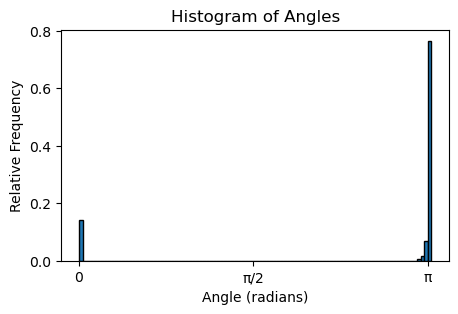

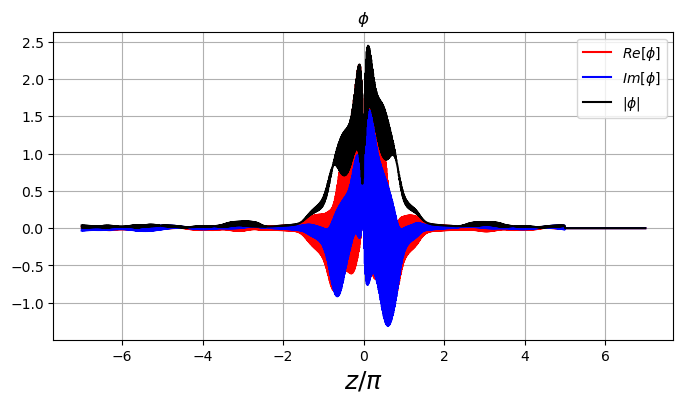

-3.1415470009223094 3.14158457336289
0.0 3.14158457336289


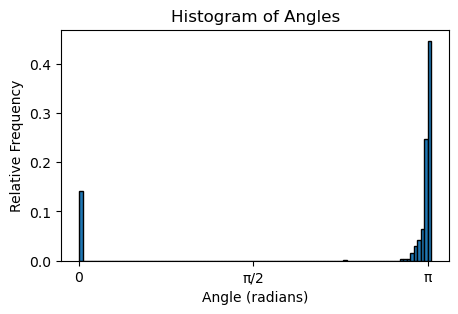

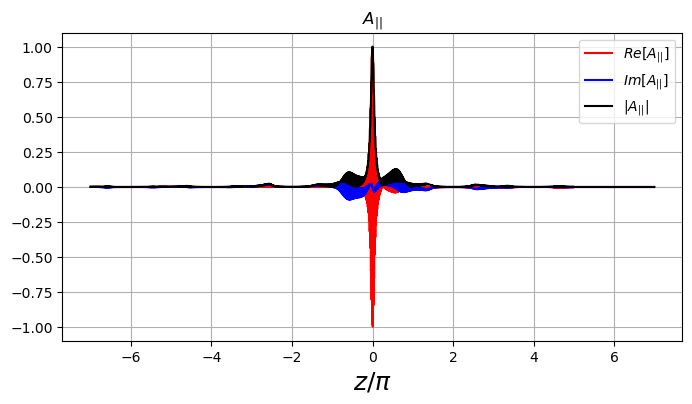

-3.141579308730876 3.1415124350583907
0.0 3.141579308730876


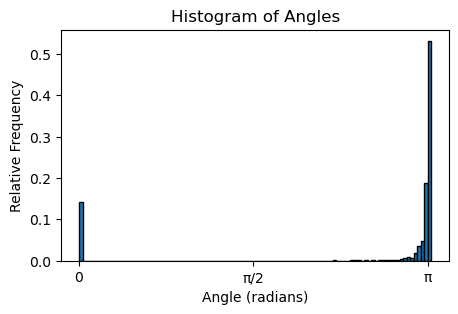

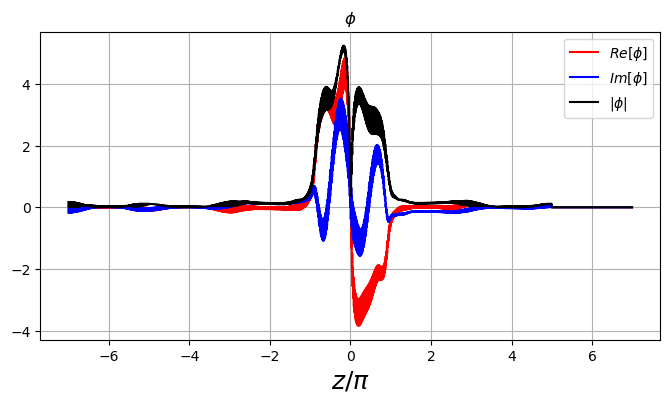

-3.141331448679187 3.1414341679861
0.0 3.1414341679861


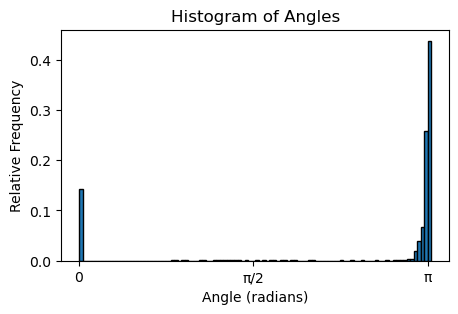

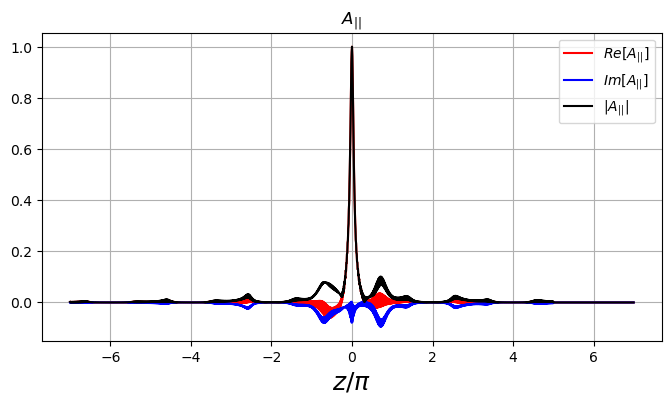

-3.141294423502357 3.1415262764241465
0.0 3.1415262764241465


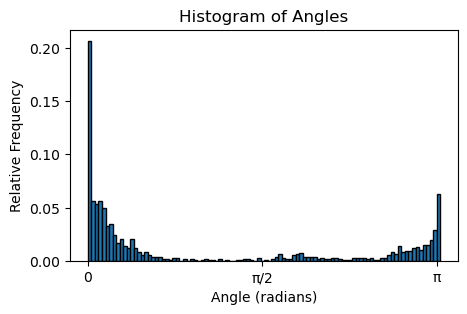

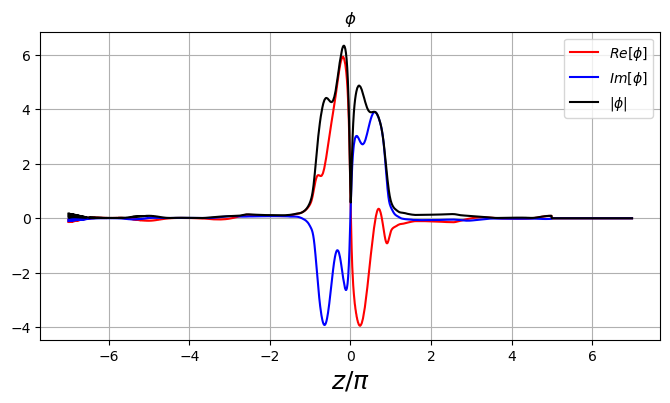

-3.1413496371287297 3.1414304212548654
0.0 3.1414304212548654


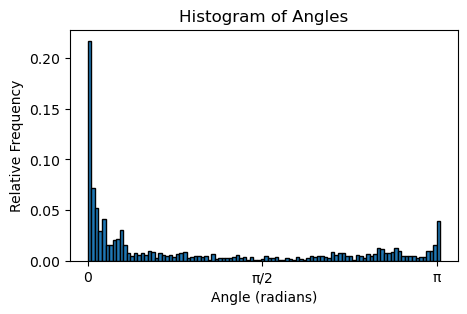

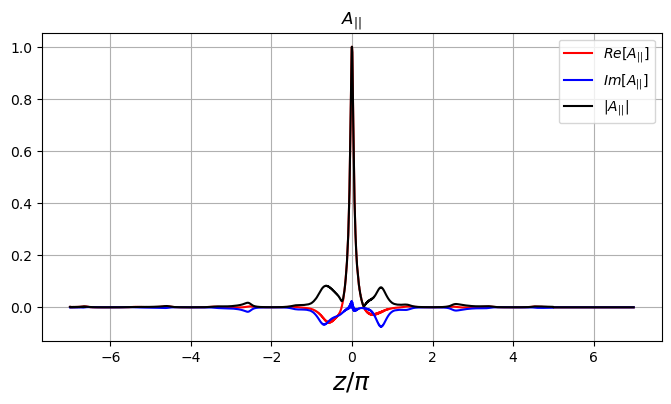

-3.141583630084087 3.140141532023272
0.0 3.141583630084087


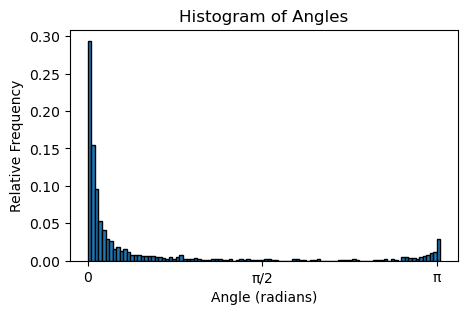

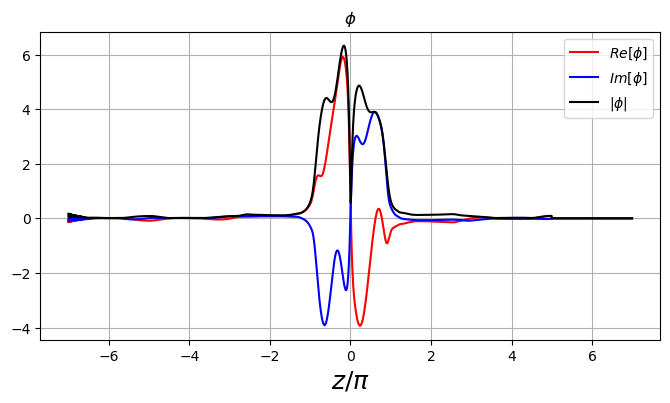

-3.1404413336706987 3.1401962982688403
0.0 3.1404413336706987


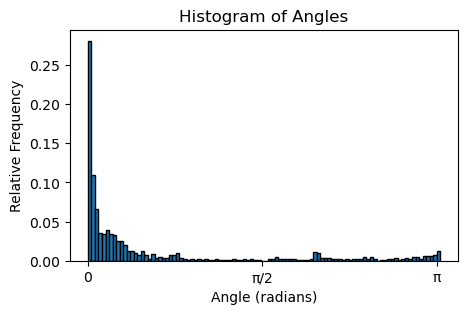

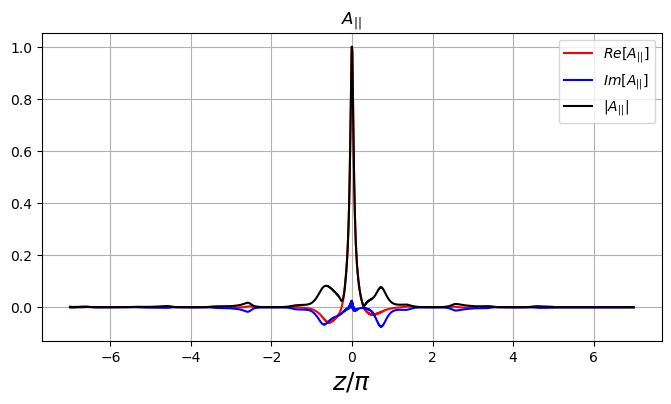

-3.1415808314925413 3.141554518325106
0.0 3.1415808314925413


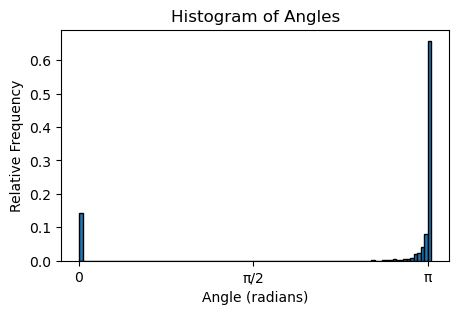

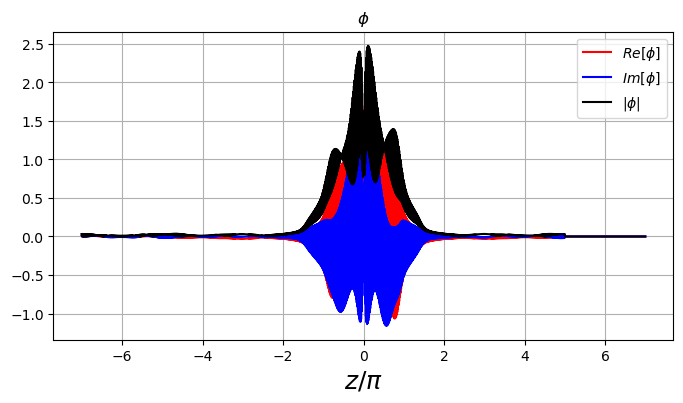

-3.1415777858643823 3.1415870394456333
0.0 3.1415870394456333


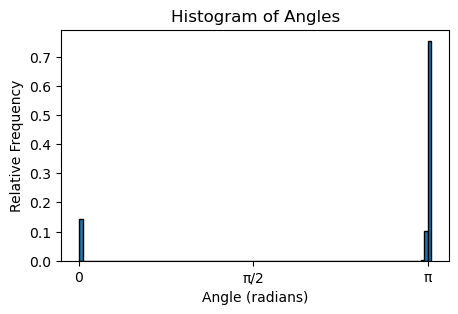

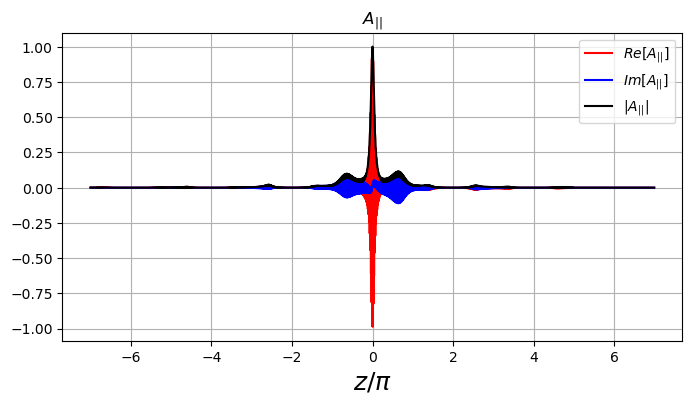

-3.1348039670899714 3.1349004235425393
0.0 3.1349004235425393


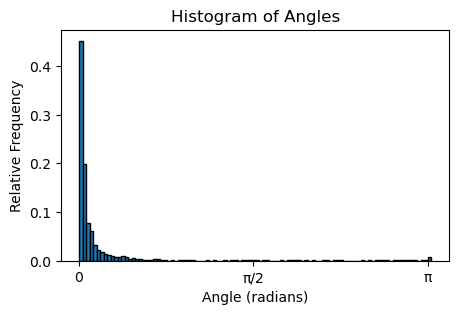

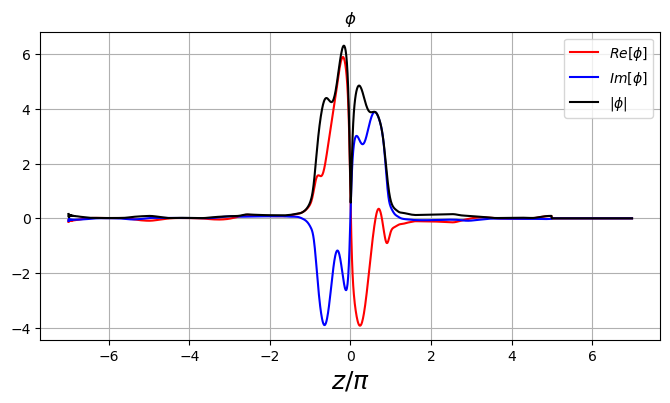

-3.1403971149480343 3.1396171233003534
0.0 3.1403971149480343


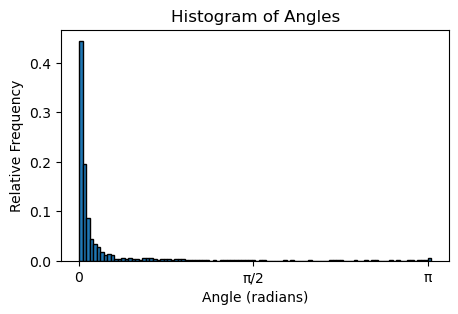

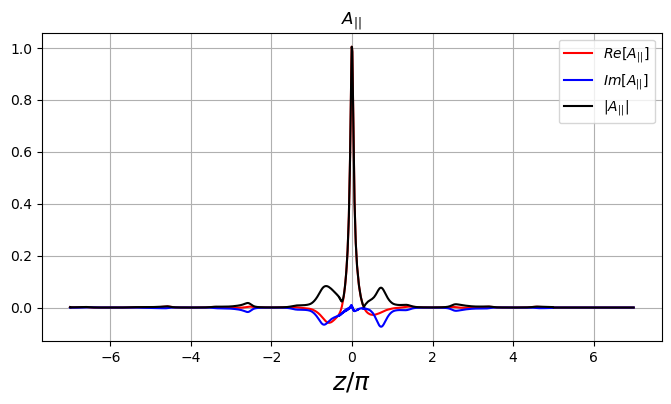

-3.141581325946521 3.141567563222676
0.0 3.141581325946521


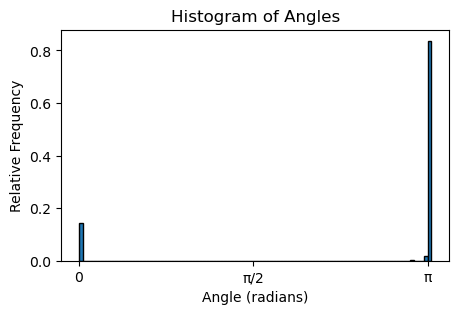

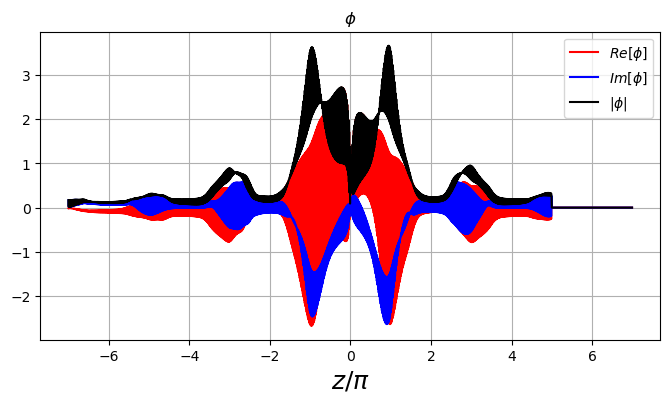

-3.141426664132193 3.1415652342831506
0.0 3.1415652342831506


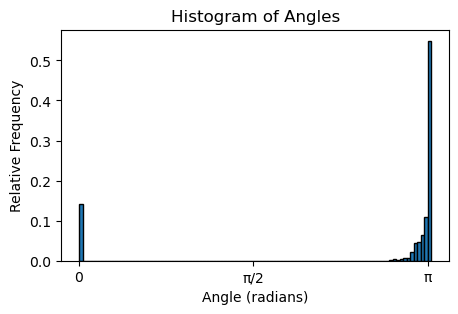

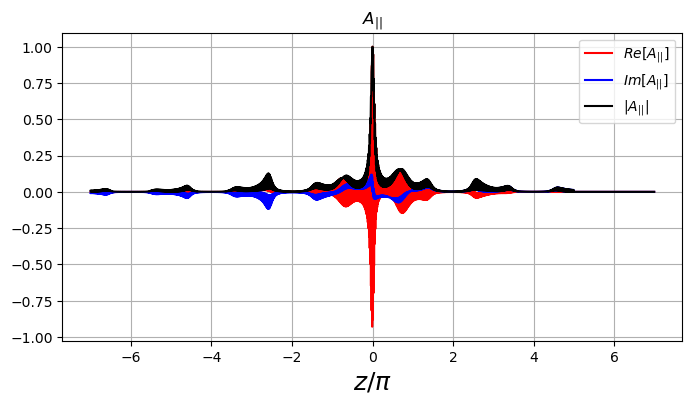

-3.1415681966550784 3.141587053718187
0.0 3.141587053718187


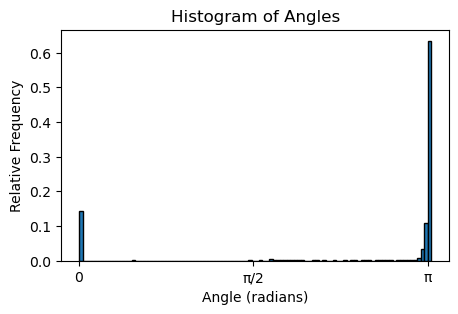

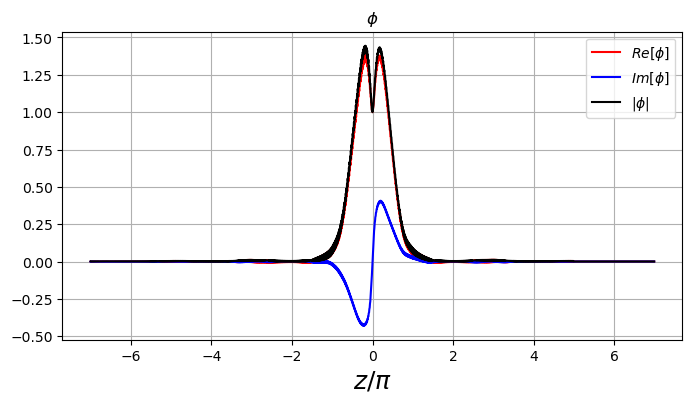

-3.1415274829896114 3.1415768304850604
0.0 3.1415768304850604


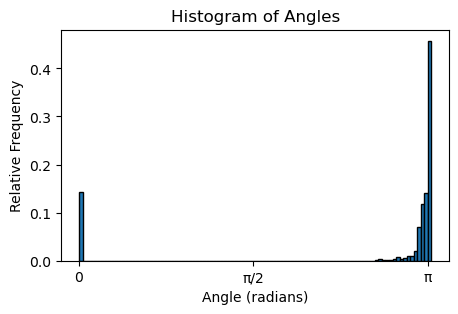

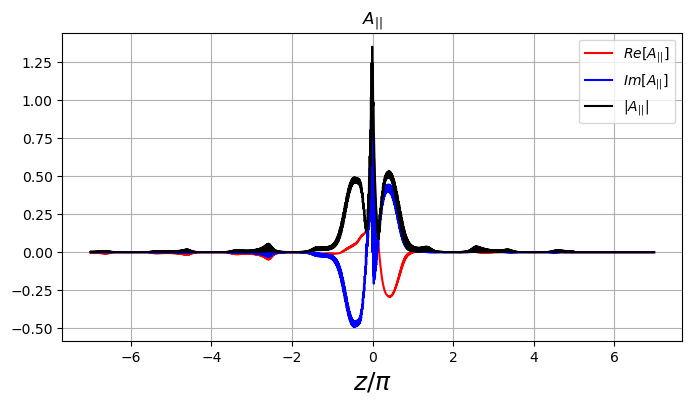

-3.141553854004865 3.141579896292233
0.0 3.141579896292233


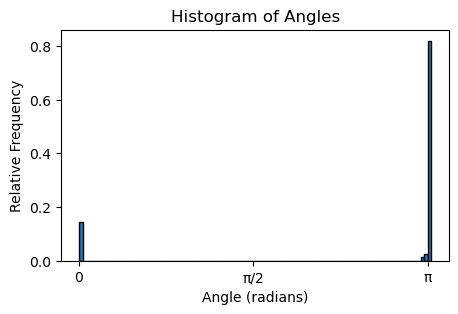

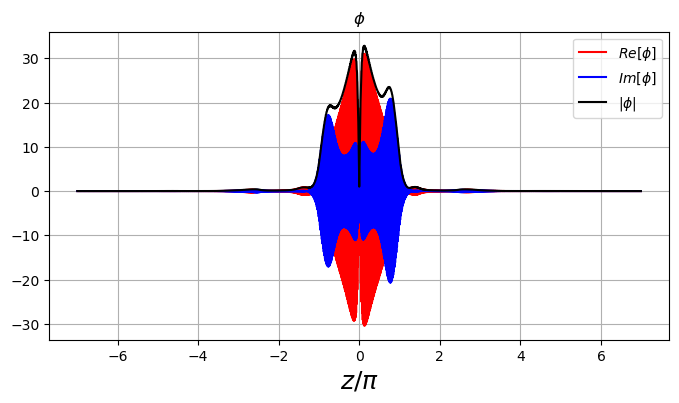

-3.14157206959808 3.141590680029006
0.0 3.141590680029006


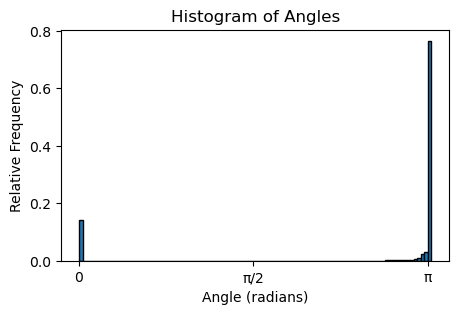

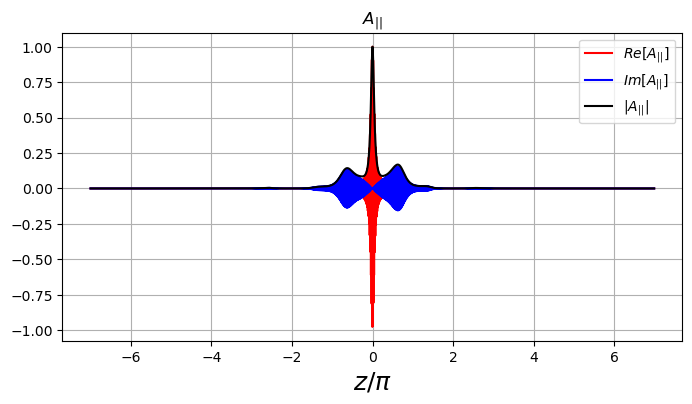

-3.1415126746618833 3.1410363916939508
0.0 3.1415126746618833


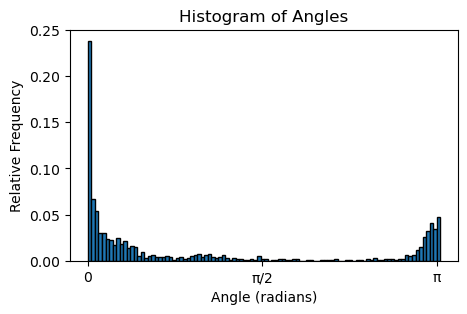

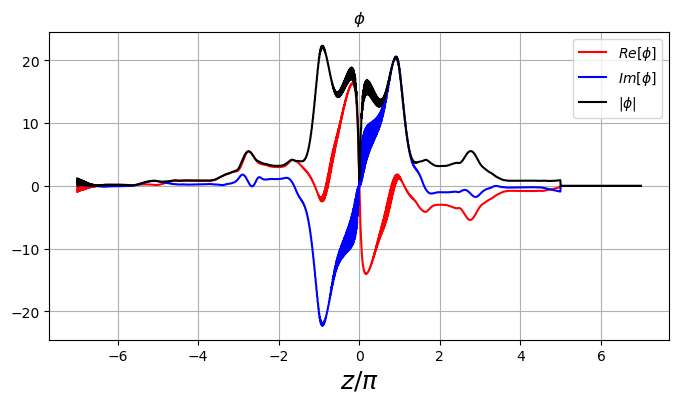

-3.141522719080862 3.1411577411886387
0.0 3.141522719080862


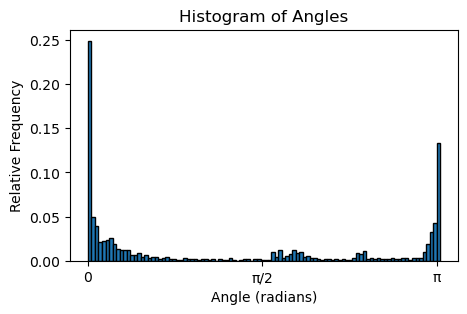

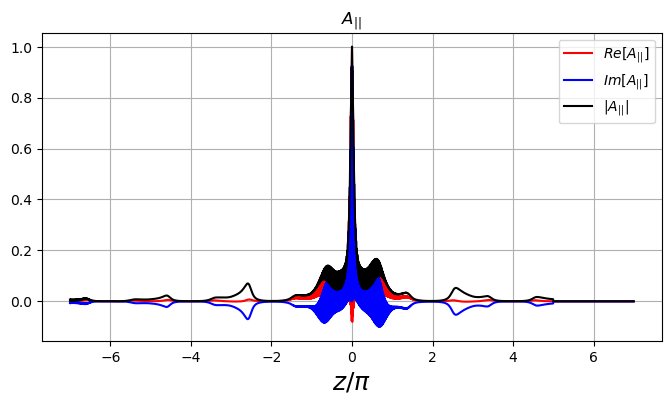

-3.1415674736905883 3.1415827226251363
0.0 3.1415827226251363


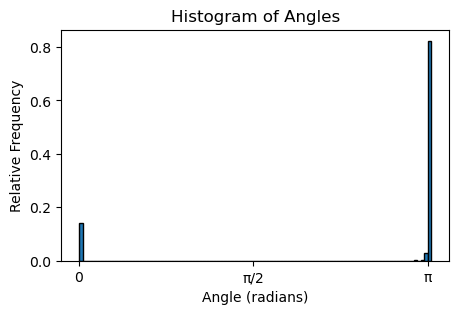

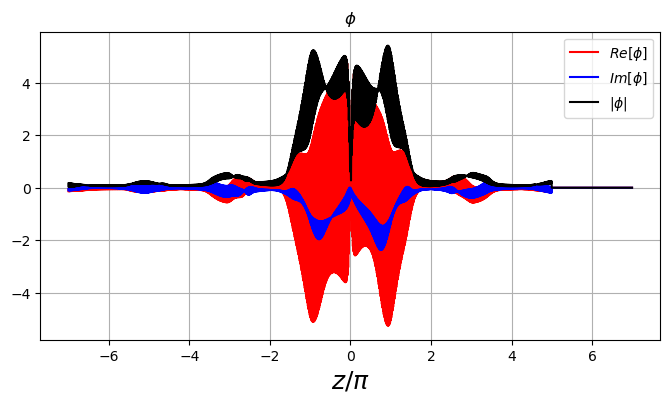

-3.1415869488908736 3.141577887071579
0.0 3.1415869488908736


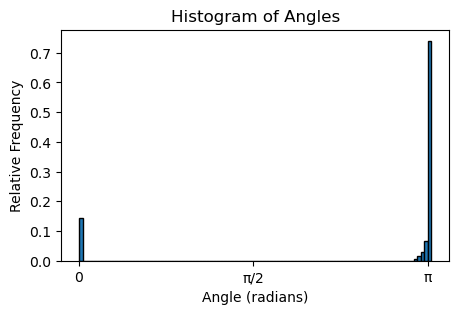

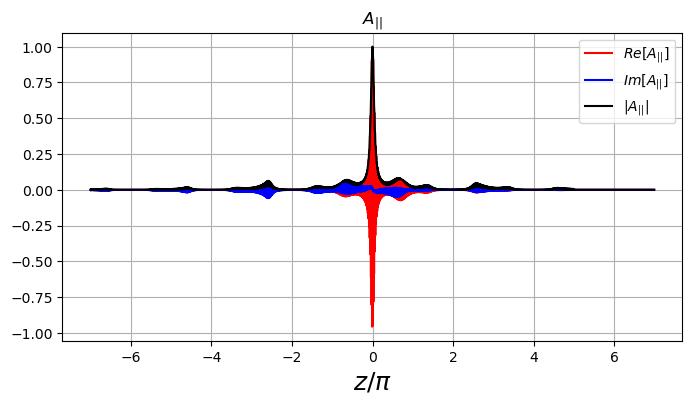

-3.1399830241937745 3.130859694989163
0.0 3.1399830241937745


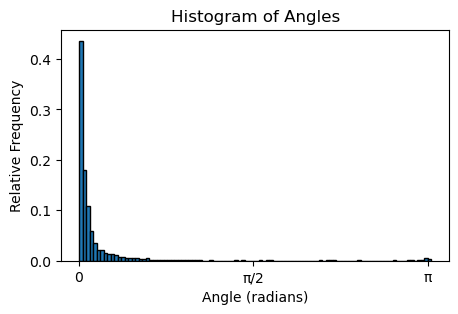

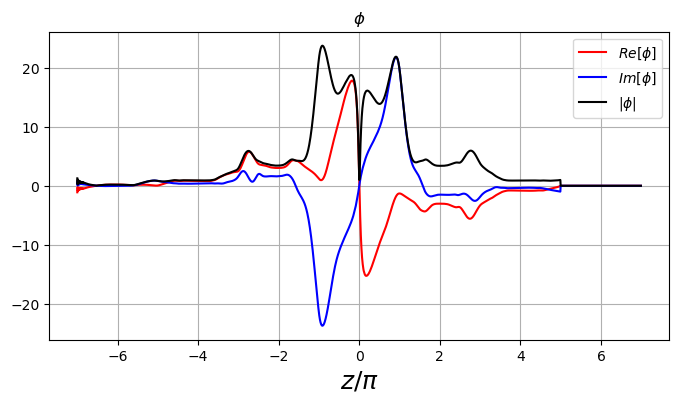

-3.1390319316464543 3.138388500990859
0.0 3.1390319316464543


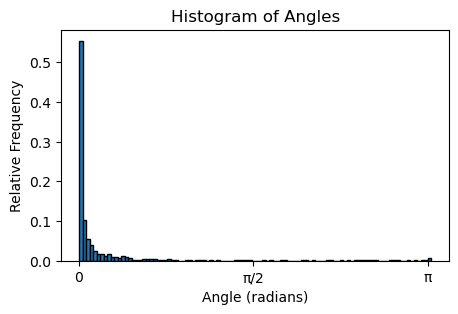

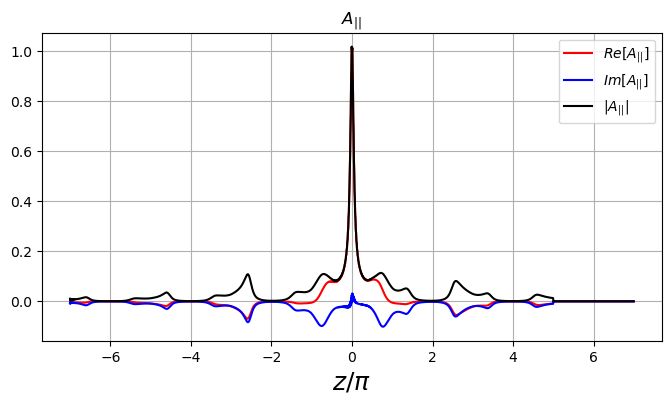

-3.1415884820985056 3.141584641105775
0.0 3.1415884820985056


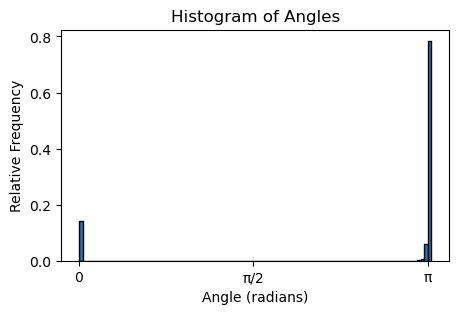

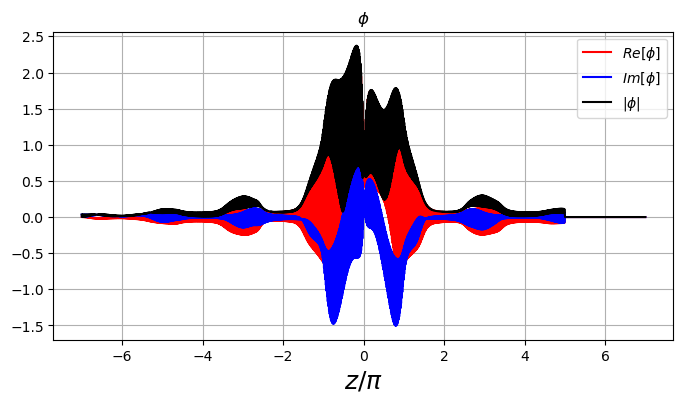

-3.141586677954658 3.141589358961855
0.0 3.141589358961855


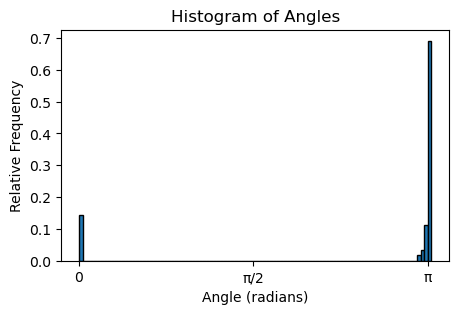

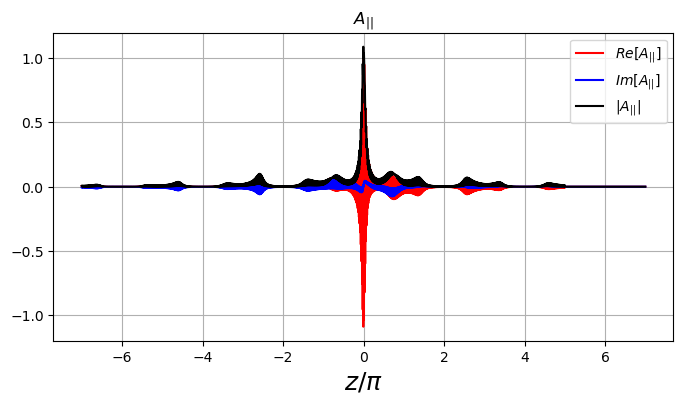

-3.1415598150345825 3.1415801629857123
0.0 3.1415801629857123


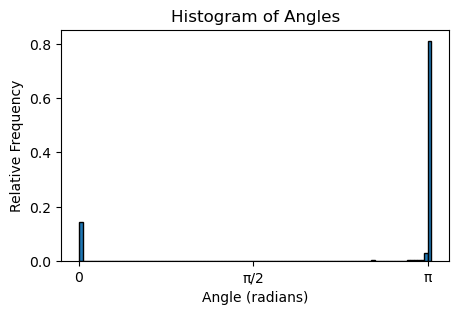

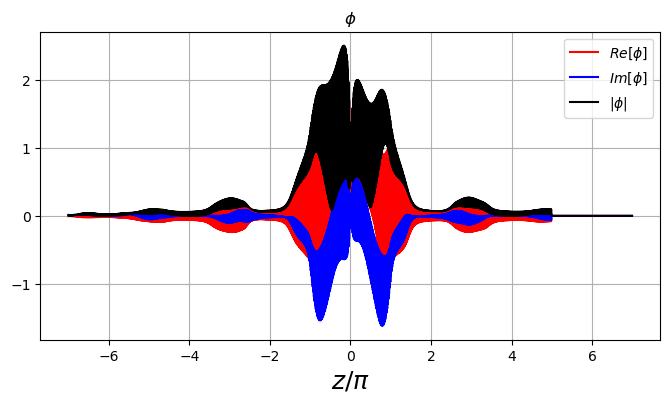

-3.141580259614022 3.1415389654877885
0.0 3.141580259614022


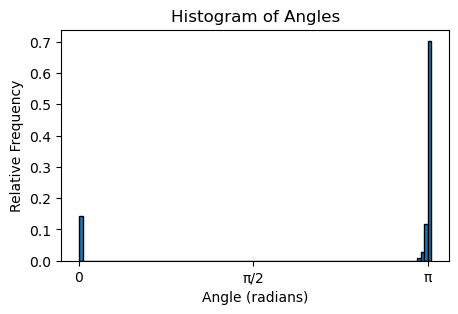

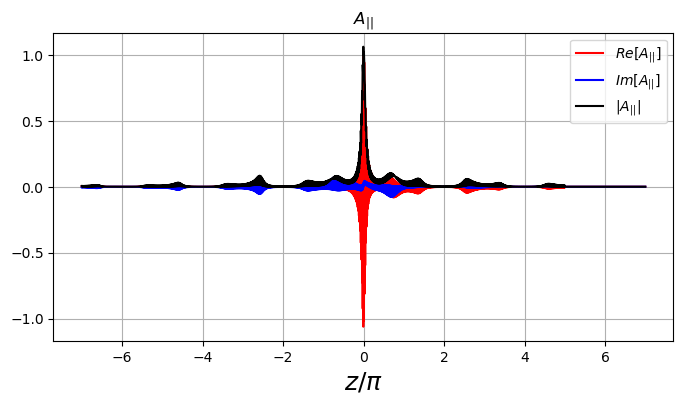

-3.141570379898632 3.141312096407117
0.0 3.141570379898632


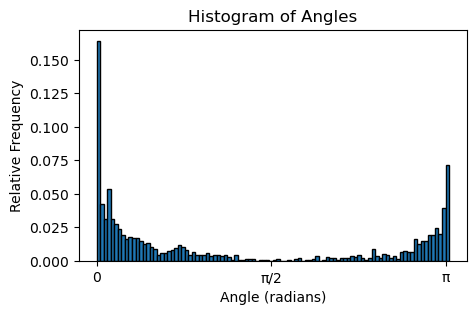

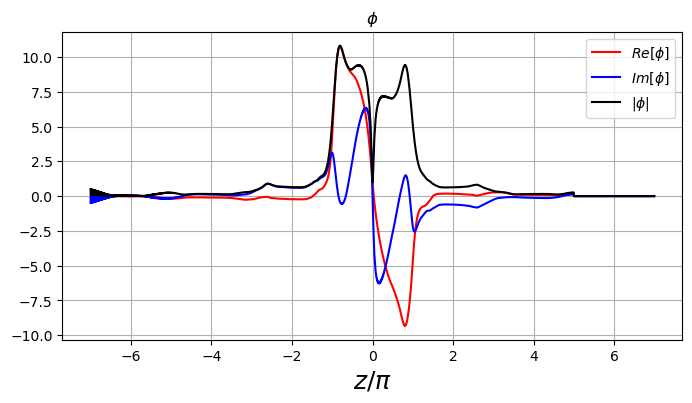

-3.1410115658470934 3.1412411116619183
0.0 3.1412411116619183


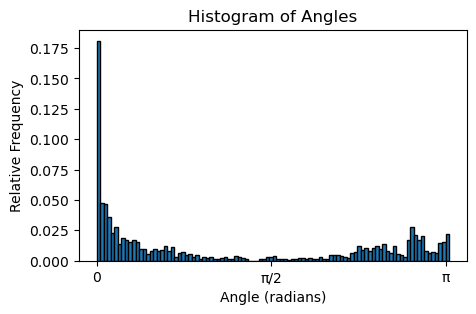

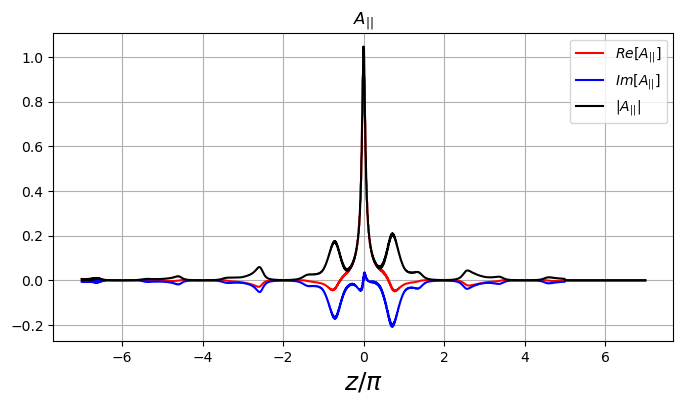

-3.1414868835235956 3.1409842677348863
0.0 3.1414868835235956


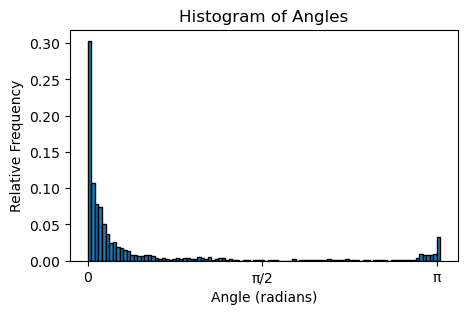

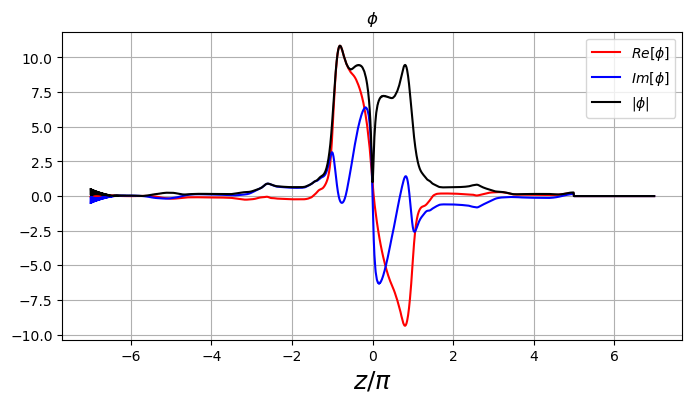

-3.141248676295565 3.1402371081507545
0.0 3.141248676295565


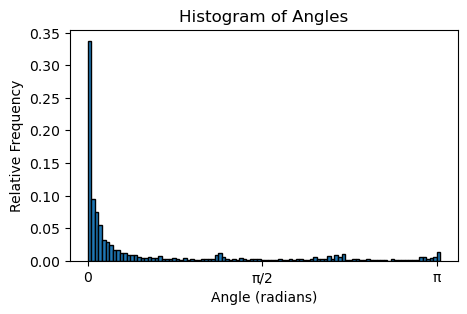

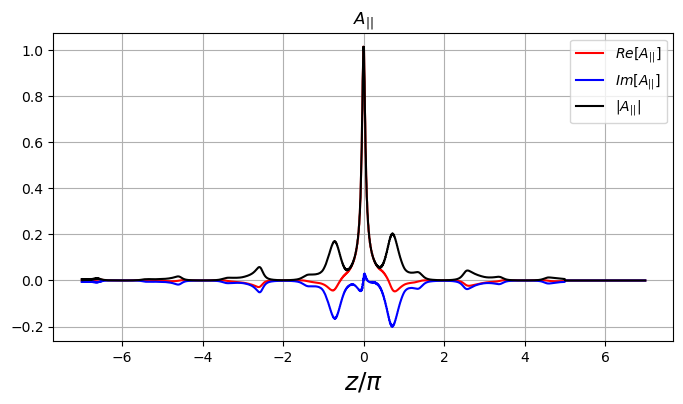

-3.1415231606013365 3.141579311380127
0.0 3.141579311380127


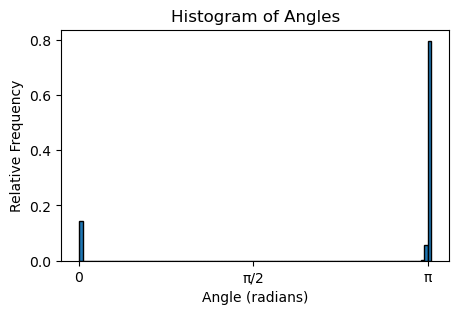

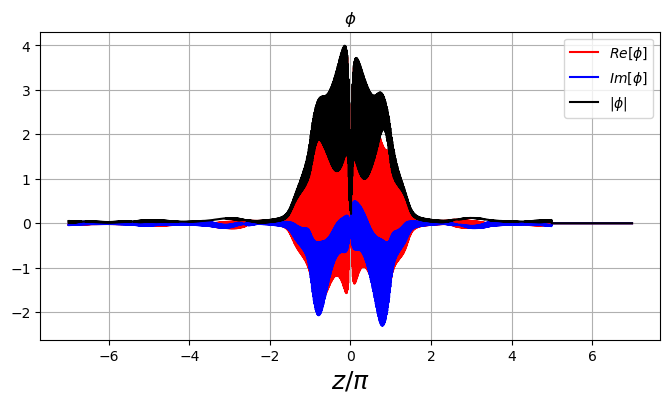

-3.141561725708814 3.1415664410994784
0.0 3.1415664410994784


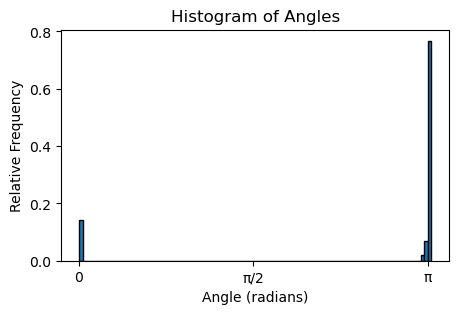

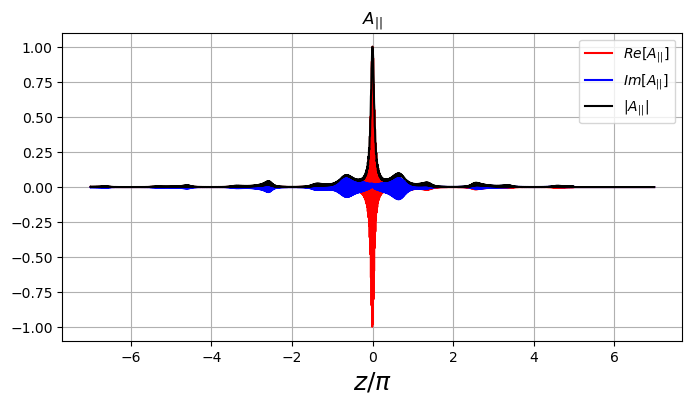

-3.1397254547229303 3.141547146450516
0.0 3.141547146450516


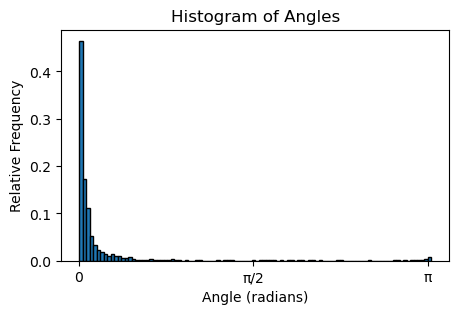

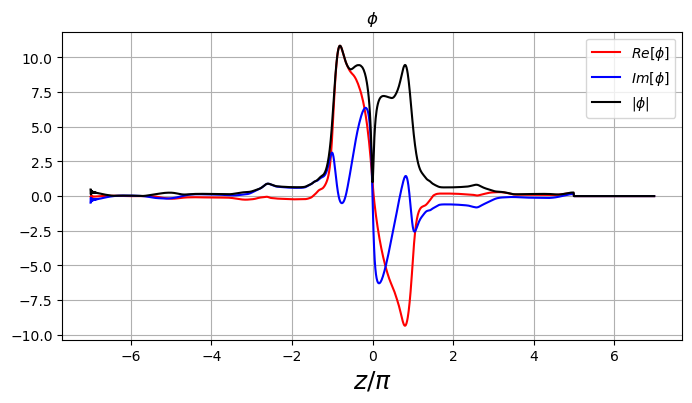

-3.139822214622915 3.1405162905824344
0.0 3.1405162905824344


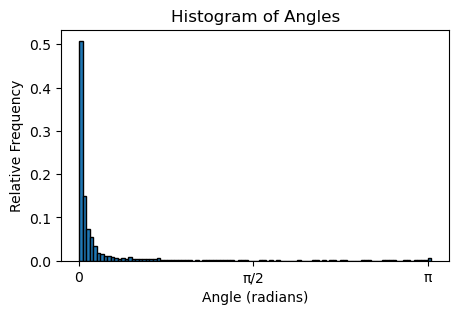

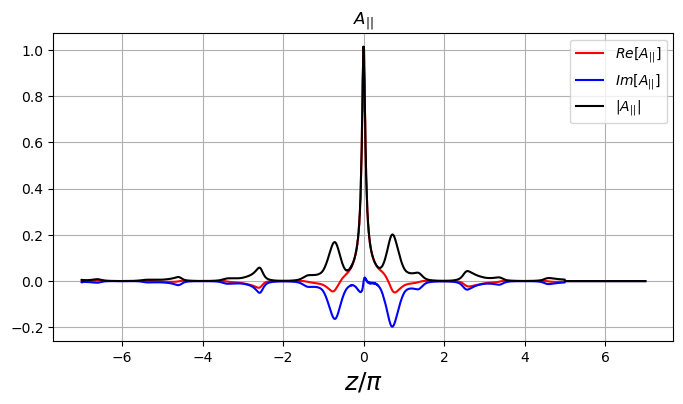

-3.14157669447672 3.1415746067703907
0.0 3.14157669447672


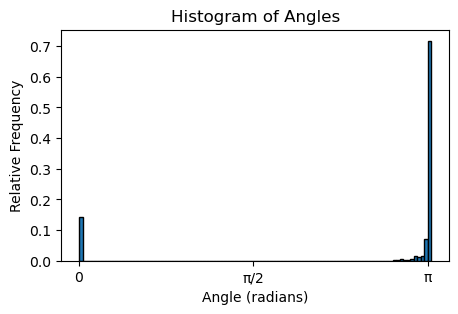

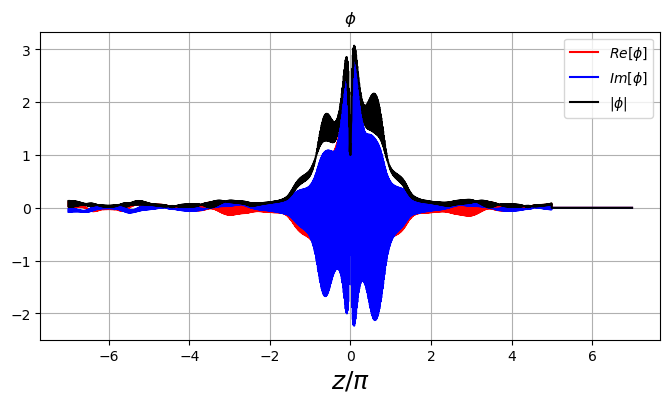

-3.1415718031079227 3.141510300620338
0.0 3.1415718031079227


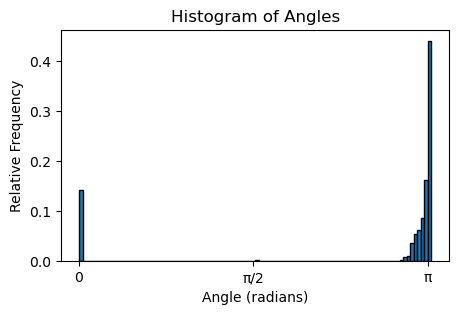

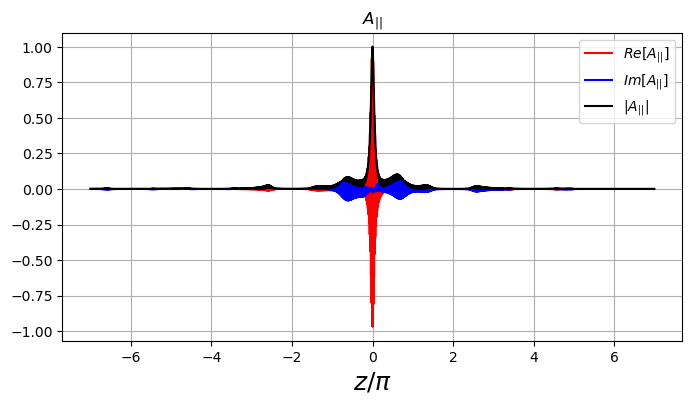

-3.141590892929022 3.1415478284299594
0.0 3.141590892929022


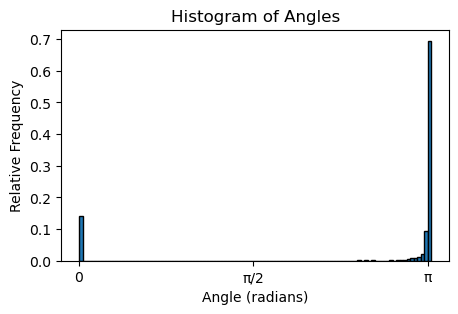

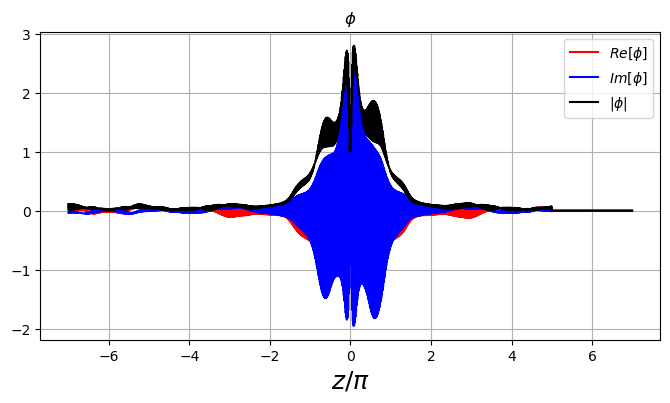

-3.1414436019456815 3.1415722894185505
0.0 3.1415722894185505


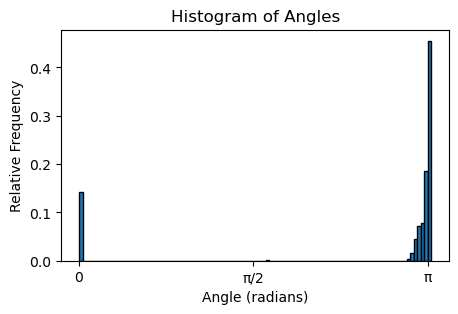

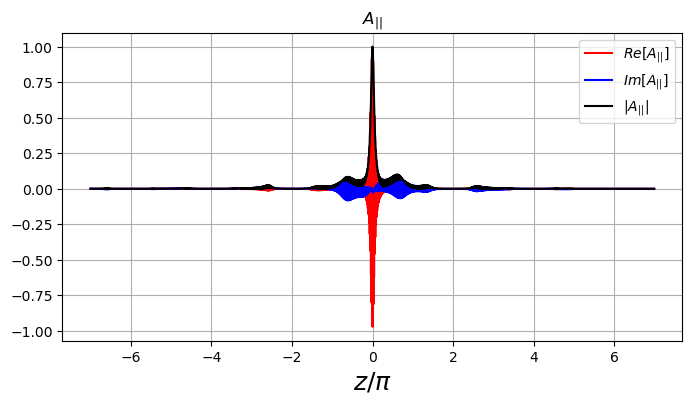

-3.141467230163675 3.1414193140984428
0.0 3.141467230163675


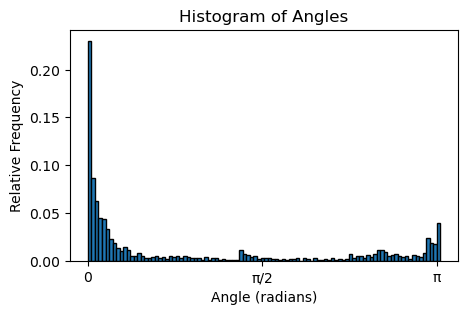

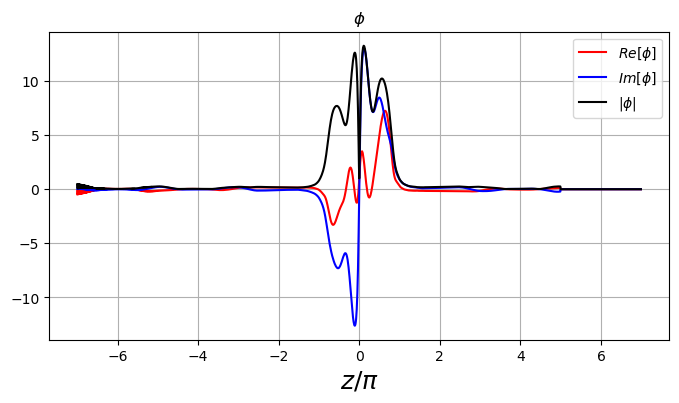

-3.140166793463181 3.139887528255466
0.0 3.140166793463181


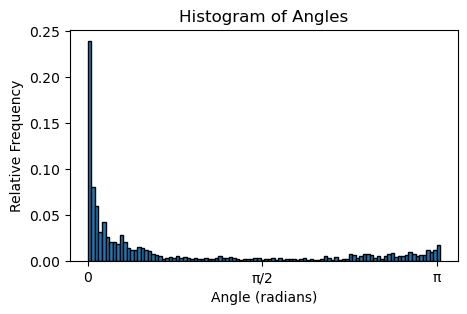

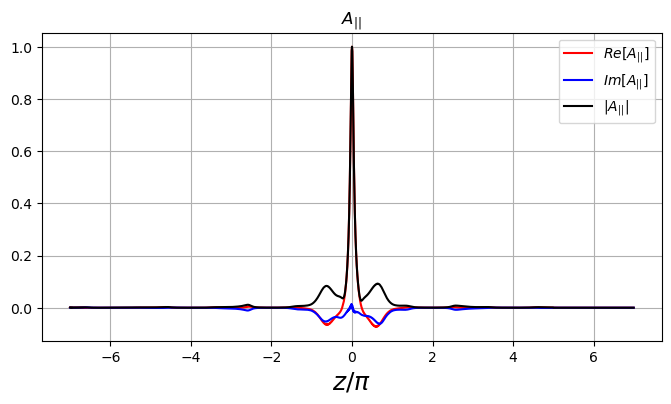

-3.1415013037765713 3.140546812449538
0.0 3.1415013037765713


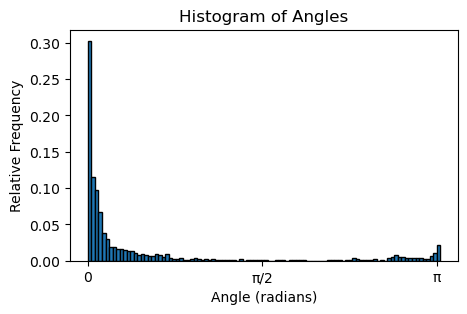

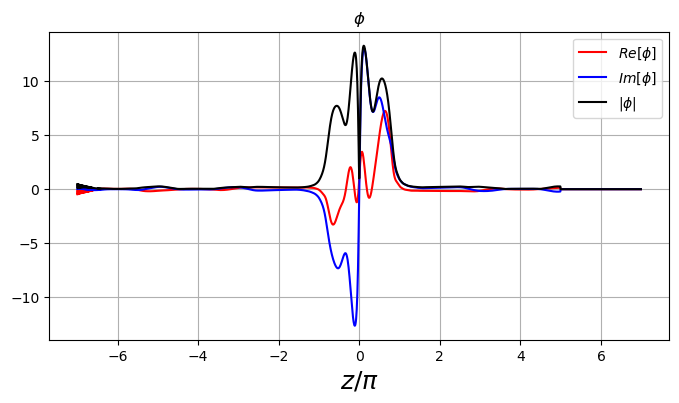

-3.1394936007867598 3.140279594839943
0.0 3.140279594839943


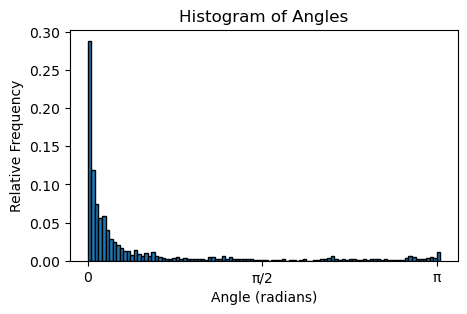

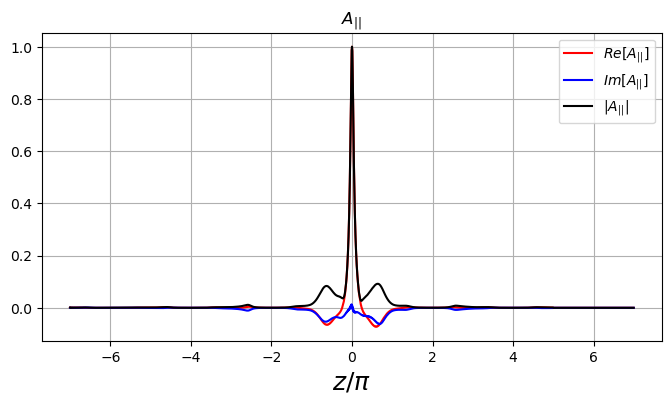

-3.141527071530038 3.141532865024812
0.0 3.141532865024812


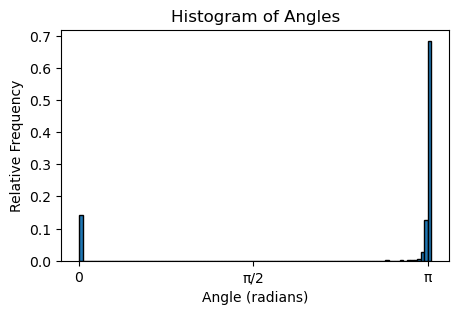

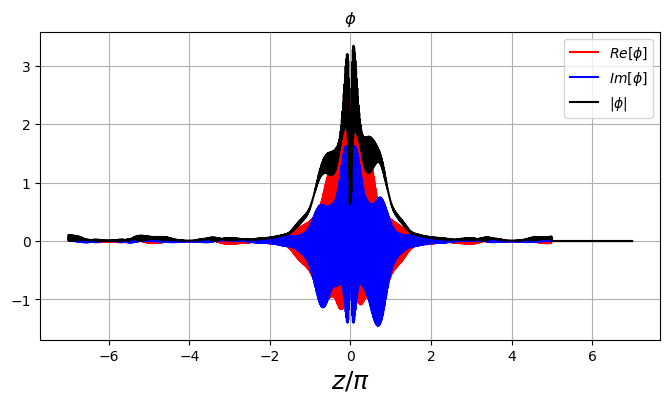

-3.1415048811331476 3.141559505833496
0.0 3.141559505833496


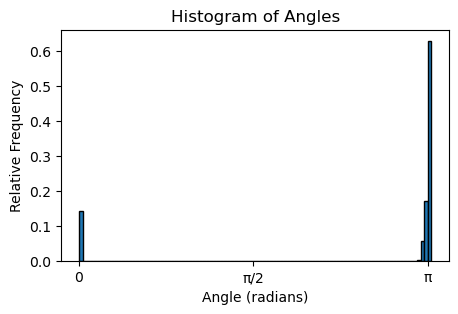

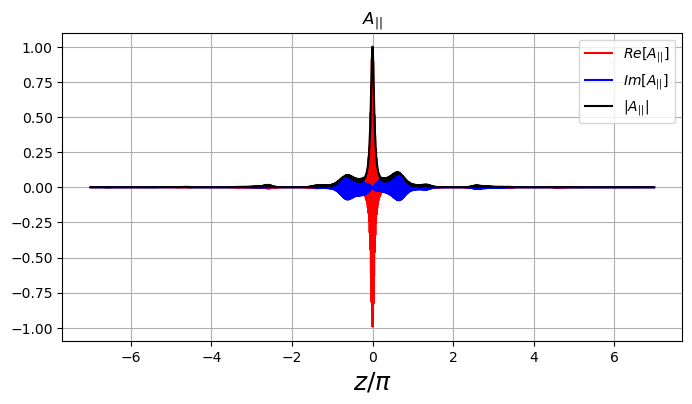

-3.1363416903146493 3.136022643937286
0.0 3.1363416903146493


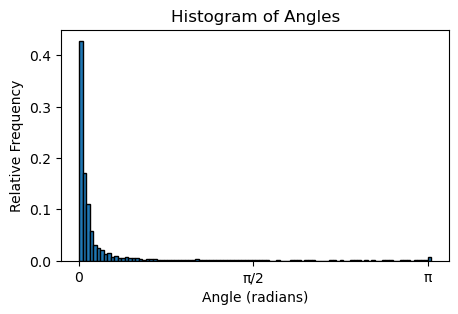

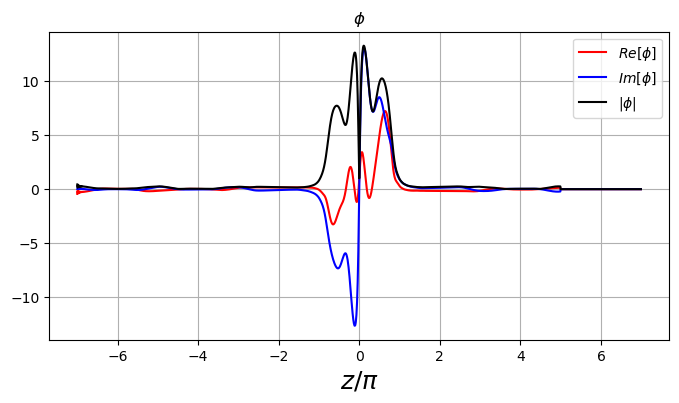

-3.13942990314178 3.1387619019437296
0.0 3.13942990314178


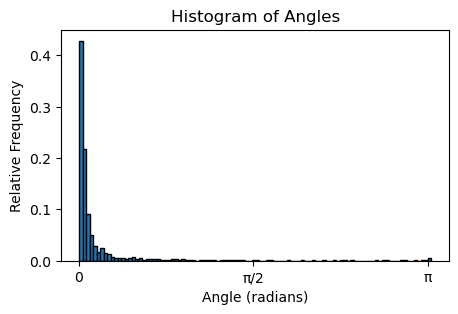

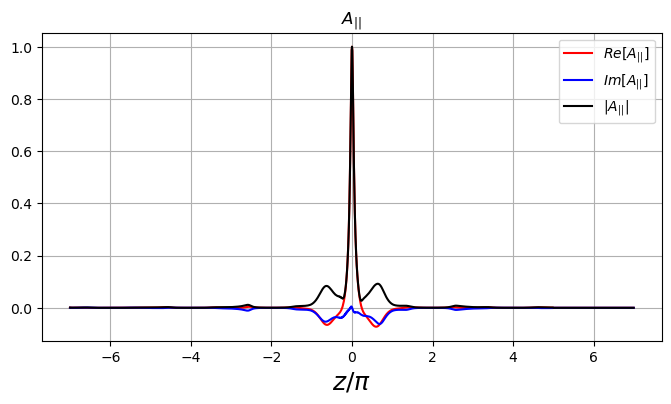

-3.1415912568695363 3.1415226883987484
0.0 3.1415912568695363


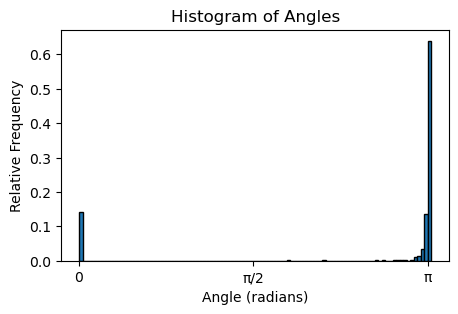

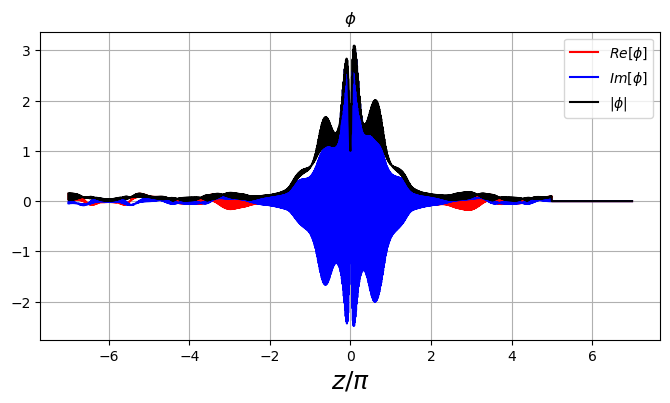

-3.1413559485445566 3.1413672062385483
0.0 3.1413672062385483


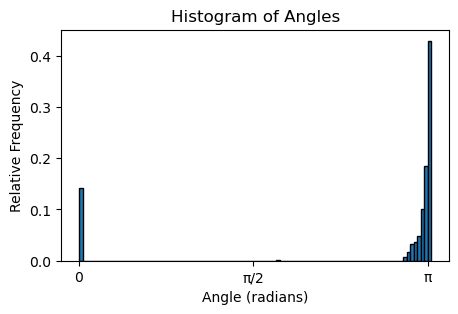

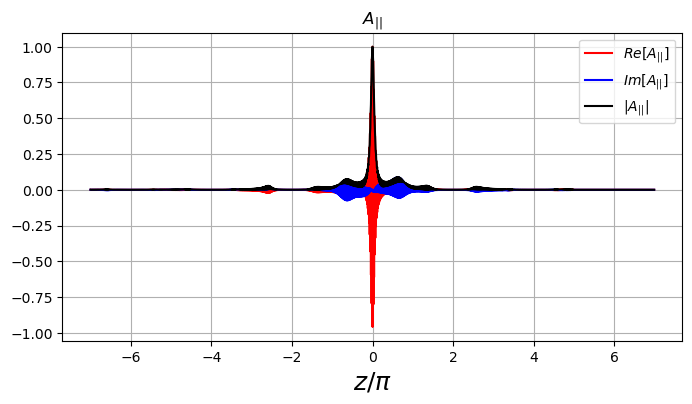

-3.1415803293241824 3.141547064754337
0.0 3.1415803293241824


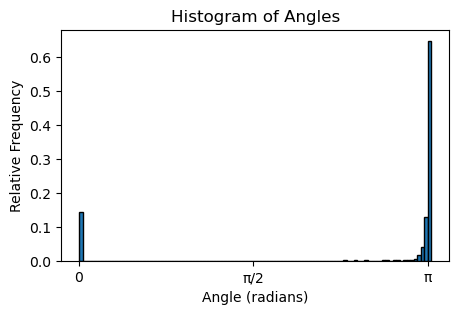

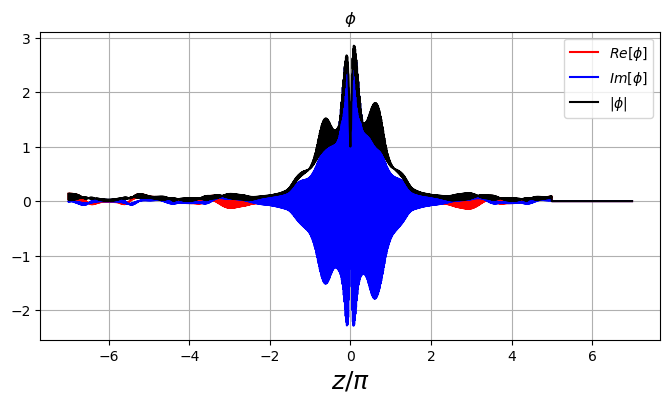

-3.141534662400985 3.1415651379252973
0.0 3.1415651379252973


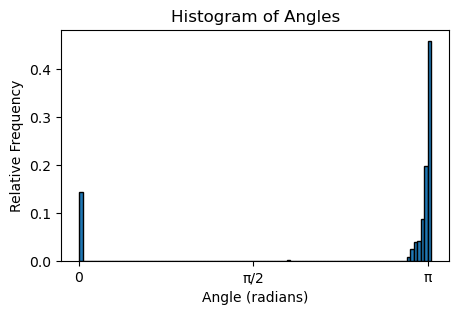

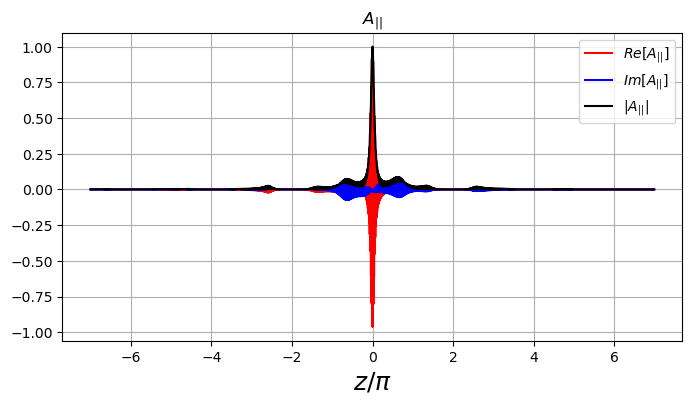

-3.141534636431705 3.1401463164378836
0.0 3.141534636431705


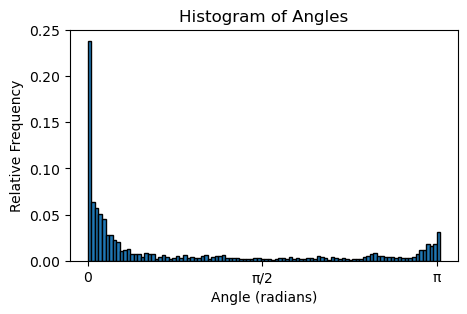

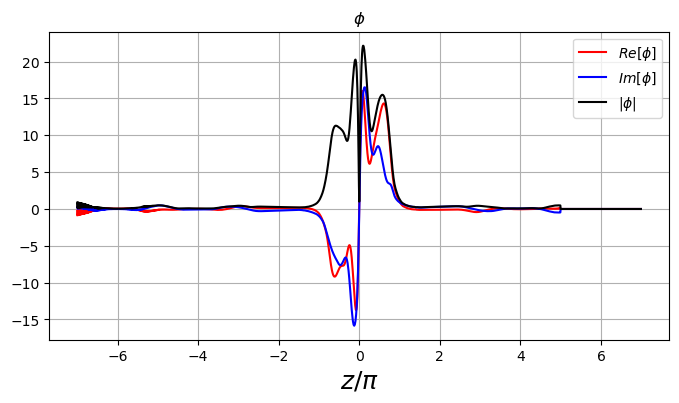

-3.1399644572717005 3.139698873741717
0.0 3.1399644572717005


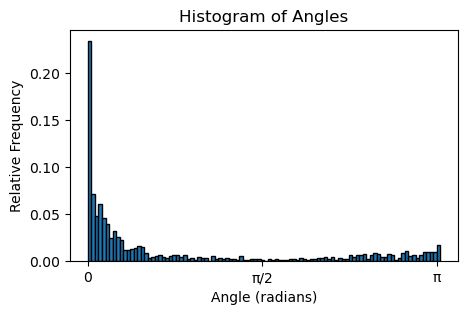

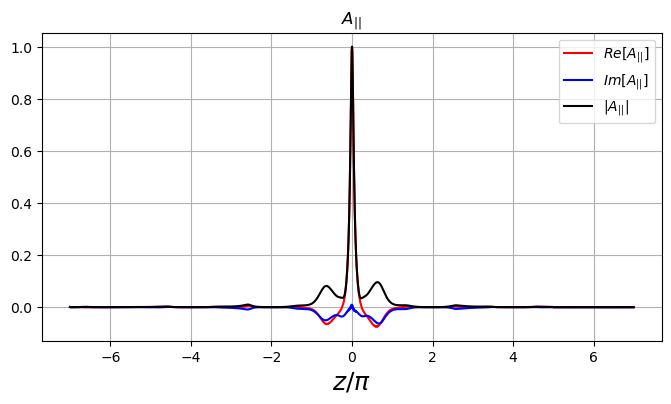

-3.1412561147135896 3.139842443105141
0.0 3.1412561147135896


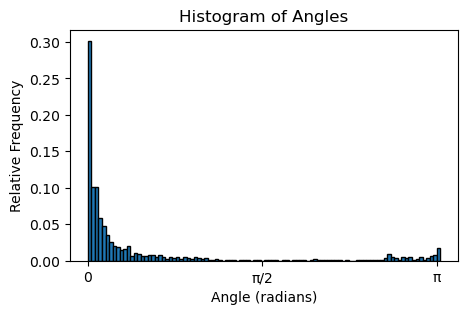

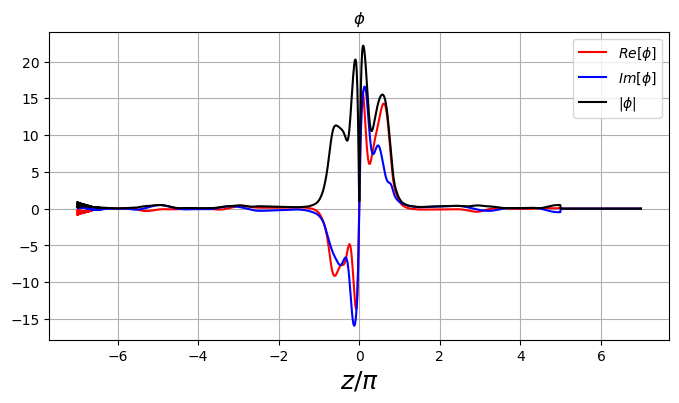

-3.139196774021374 3.139386886029387
0.0 3.139386886029387


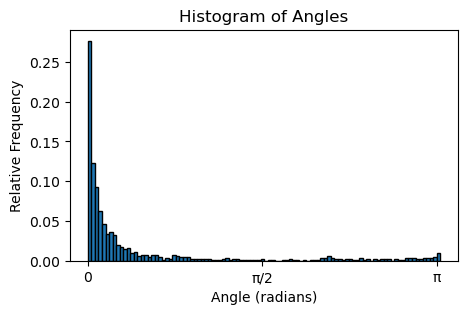

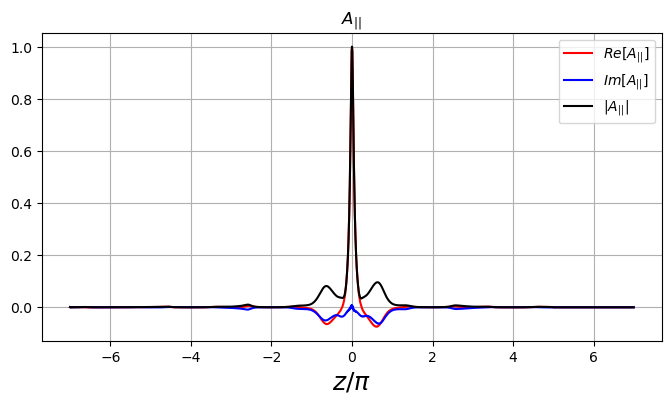

-3.1415564813860257 3.1415485280079545
0.0 3.1415564813860257


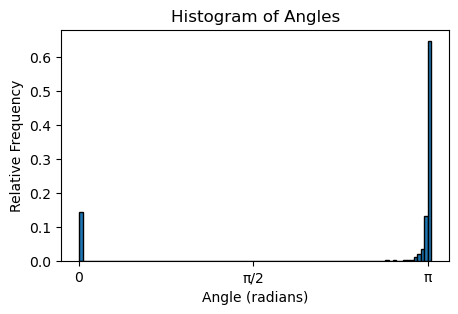

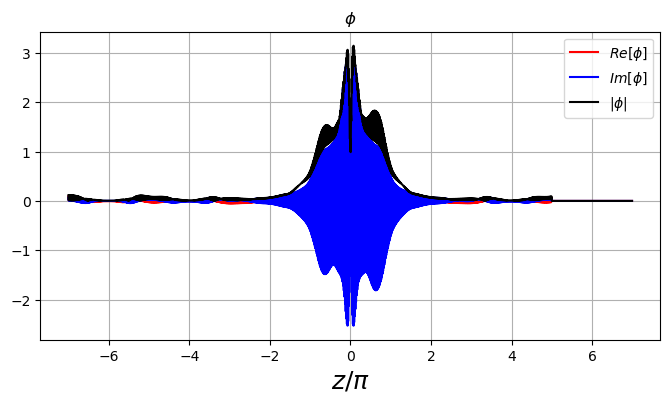

-3.1415425628917246 3.1415584791434954
0.0 3.1415584791434954


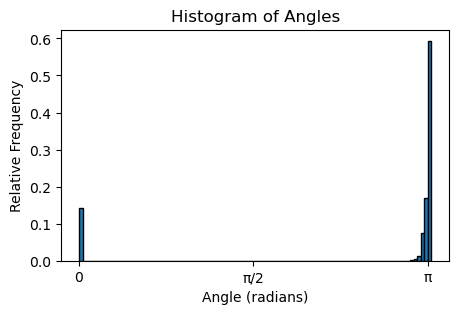

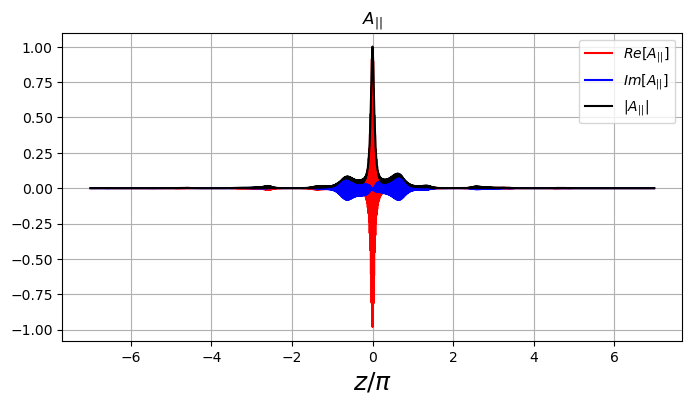

-3.132462967145845 3.1318265402316774
0.0 3.132462967145845


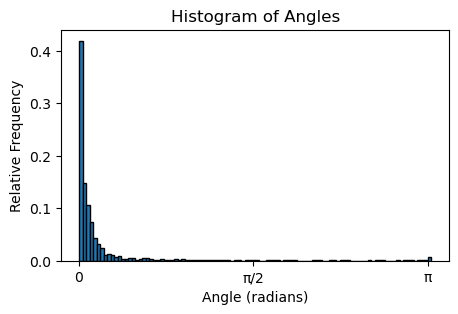

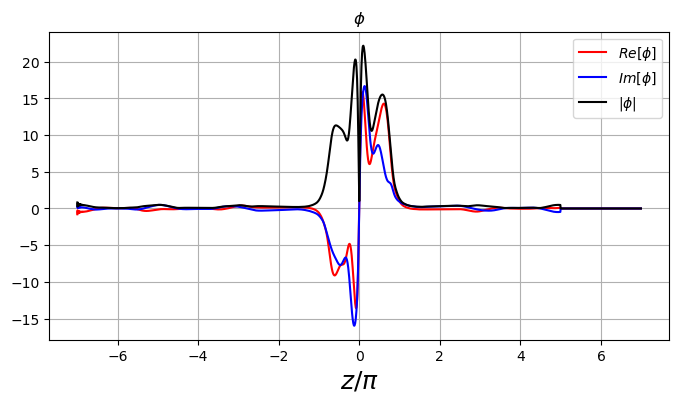

-3.139239093976366 3.1387180556031953
0.0 3.139239093976366


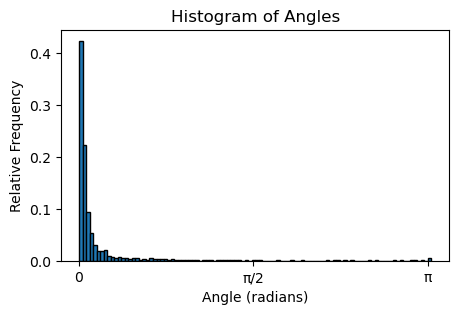

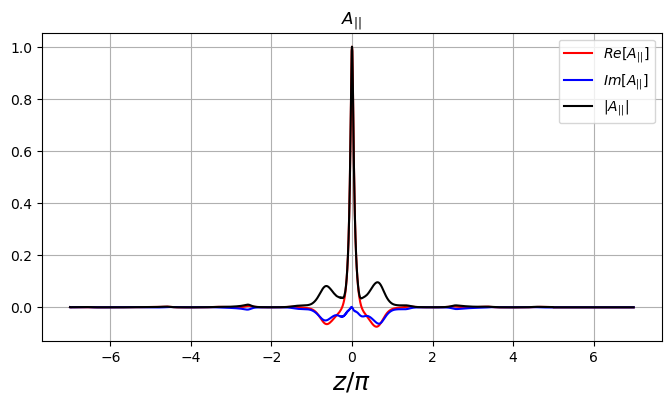

-3.14157336369785 3.14156816931703
0.0 3.14157336369785


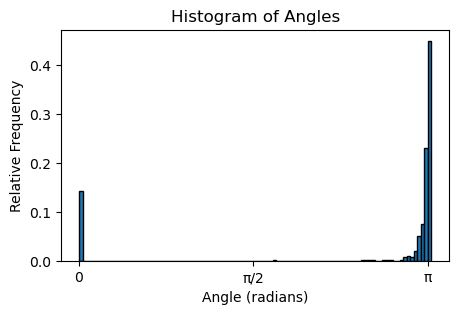

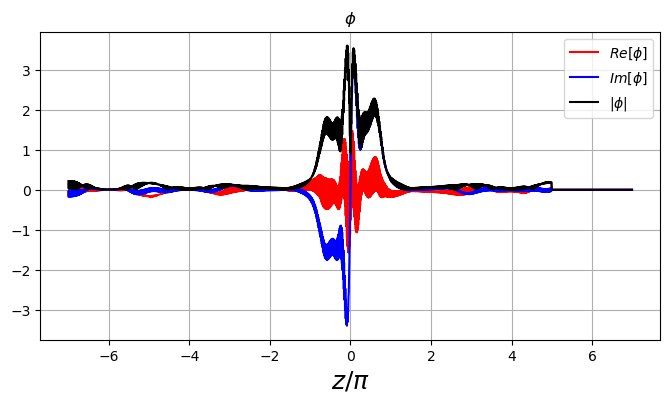

-3.1415127419999553 3.1415330942872153
0.0 3.1415330942872153


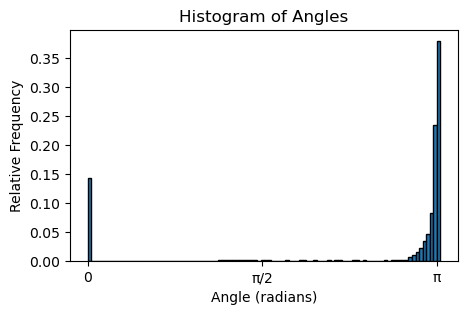

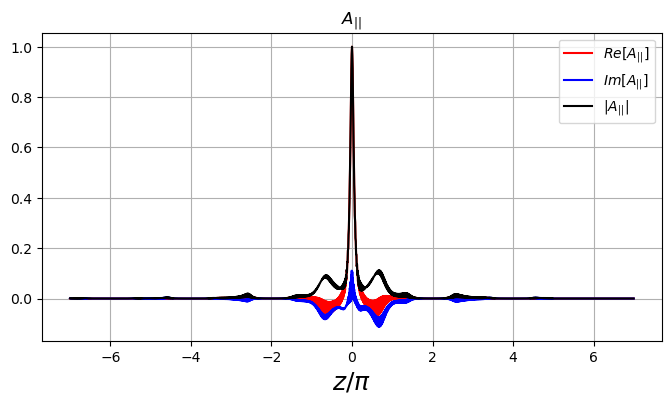

-3.1414438822571897 3.1415201099594983
0.0 3.1415201099594983


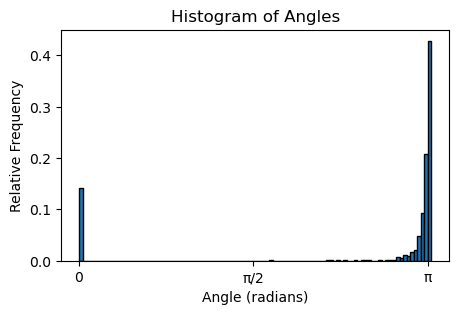

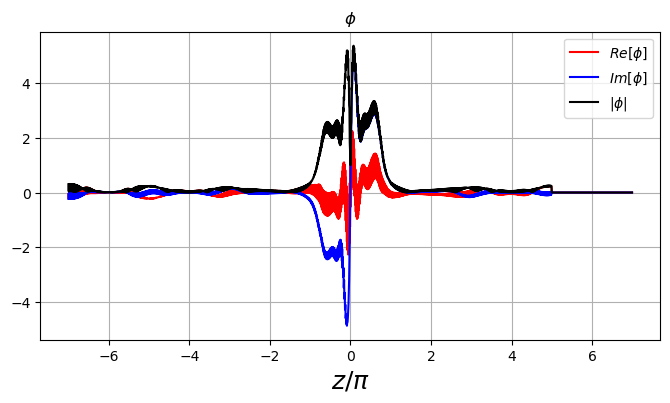

-3.1412954323753324 3.141408409541566
0.0 3.141408409541566


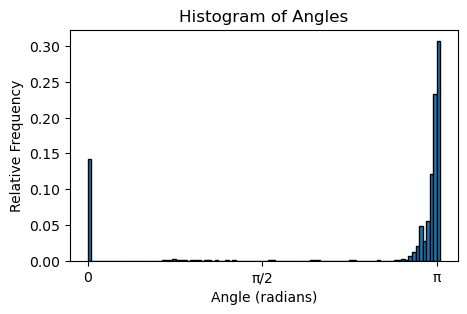

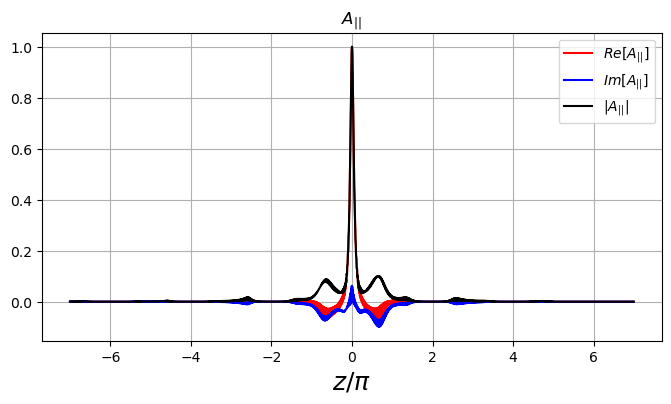

-3.141550901809009 3.14081018836597
0.0 3.141550901809009


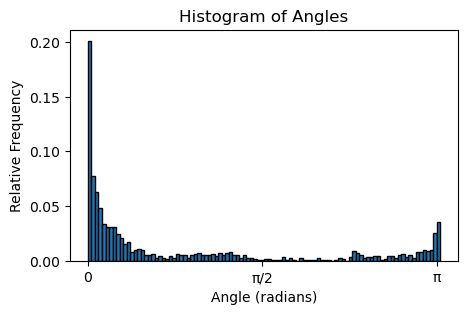

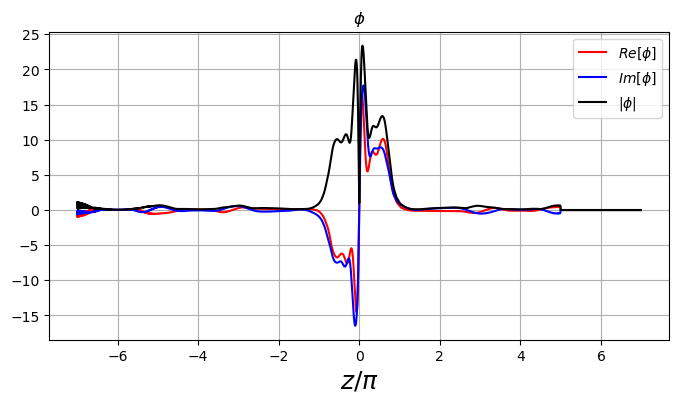

-3.1406309790714917 3.1392168331793124
0.0 3.1406309790714917


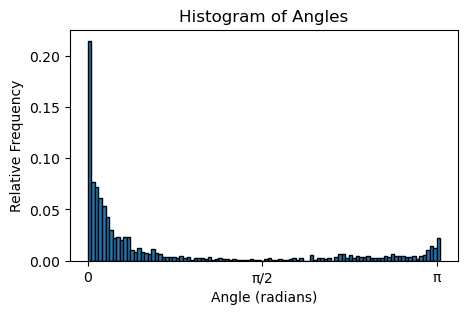

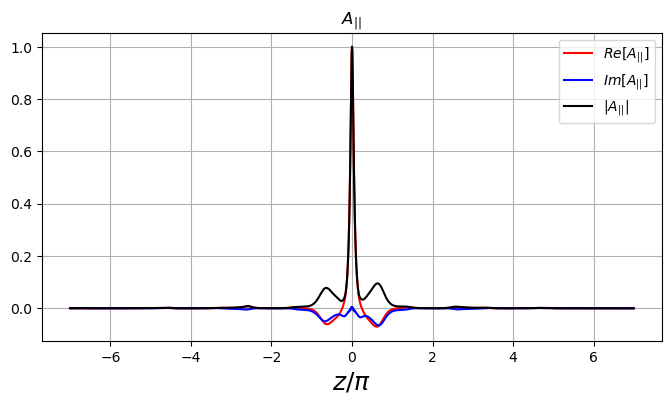

-3.1412755480399377 3.1390842043200227
0.0 3.1412755480399377


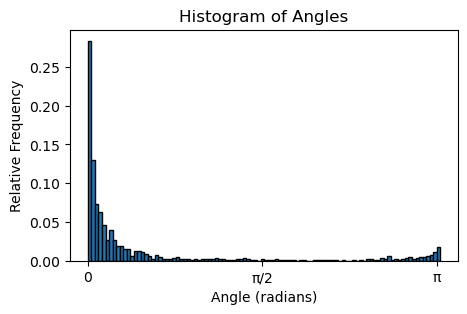

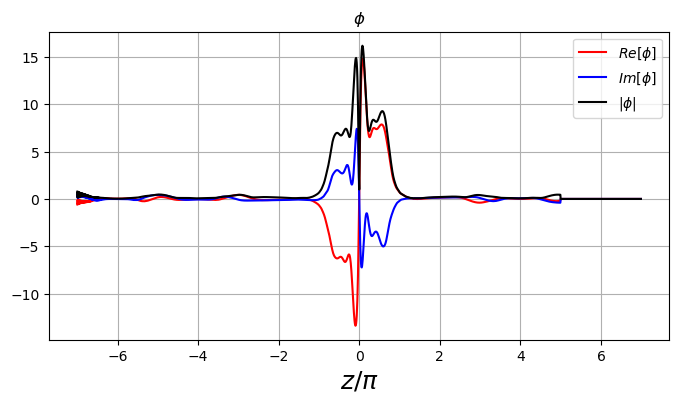

-3.138772395441012 3.1390471416472536
0.0 3.1390471416472536


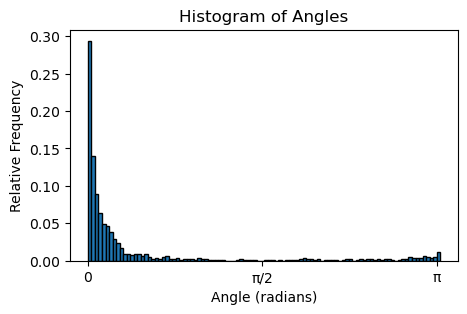

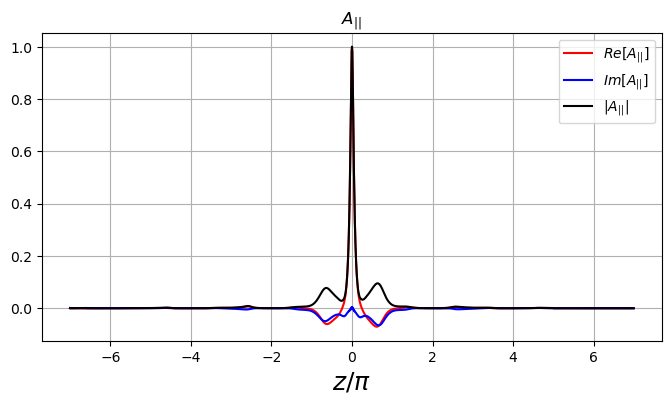

/pscratch/sd/j/joeschm/NSXTU_discharges/132588/r_0.736_q=4_MTM_mode/convergence_check/nz0_hpyz_edgeopt_scans/nz0_256_edgeopt_04/scanfiles0004/field_0010


In [ ]:
for ind, param_path in enumerate(sim_xr['filepath'].values):
    gamma = sim_xr['gamma'].values[ind]

    if not math.isnan(gamma):
        beta = sim_xr['beta'].values[ind]
        
        try:
            bpar = sim_xr['bpar'].values[ind]
        except:
            bpar = False

        field_quantities = ['phi']

        if beta > 0:
            field_quantities.append('apar')
            if bpar:
                field_quantities.append('bpar')

        field_path = switch_suffix_file(param_path, filetype='field')
        field_dict = return_field_dict(field_path, field_quantities)


        for field_name in field_quantities:
            complex_array = field_dict[field_name]
            
            mag_bins, rel_freq = get_fft_mag_counts(complex_num_array=complex_array)

            angle_bins, relative_frequency = get_delta_angle_counts(complex_array)

            # print(angle_bins, relative_frequency)

            plt.figure(figsize=(5, 3))
            plt.bar(angle_bins, relative_frequency, width=np.diff(angle_bins)[0], edgecolor='black', align='edge')
            
            # Setting the labels and title
            plt.xlabel('Angle (radians)')
            plt.ylabel('Relative Frequency')
            plt.title('Histogram of Angles')
            
            # Optionally, setting the x-axis to show radians
            plt.xticks(np.linspace(min(angle_bins), max(angle_bins), num=3), ['0', 'π/2', 'π'])
            plt.show()

            plotting_function(field_dict[field_name], field_dict['zgrid'], f'field_{field_name}', verbose=False)
            # print(field_path)


        

        # print(field_dict)

print(field_path)

    


In [ ]:
# print(field_dict['phi'][0])

In [ ]:
# plotting_function(field_dict['phi'], field_dict['zgrid'], 'field_phi', angles, verbose=True)
# print(field_path)

In [ ]:
# sim_xr['suffix']

In [ ]:
# sim_xr['filepath']